<a href="https://colab.research.google.com/github/Luzdeyduque/DEPAVUM-232/blob/main/Modelos/Vocal_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Librerias


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, accuracy_score, f1_score, r2_score, log_loss
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
import joblib
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
from google.colab import files
from IPython.display import display
import numpy as np

#Carga de datos

In [ ]:
# Selecciona y sube el archivo CSV desde tu computadora
uploaded = files.upload()

# Cargar el dataset desde el archivo CSV subido
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)


Saving U_Mezclada.csv to U_Mezclada (1).csv


#Visualización y procesamiento de datos

##Visualización de datos sin depurar

In [ ]:
# Eliminar las columnas no deseadas (columnas Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#Datos sin procesar
print('Número de características en el dataset sin depurar:', df.shape[1])
print('Número de datos en el dataset :                     ', df.shape[0],'\n')

print("Dataset sin depurar:")
display(df.head(300))

Número de características en el dataset sin depurar: 19
Número de datos en el dataset :                      300 

Dataset sin depurar:


,AUDIO,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,Gender
0,AVPEPUDEA0056u1,125.643,133.558,123.069,0.307,0.000024,0.108,0.156,0.323,4.537,0.466,0.982,1.877,6.054,2.947,0.010018,27.366,1,1
1,AVPEPUDEA0054u3,329.405,333.374,312.627,0.256,0.000008,0.136,0.132,0.407,1.496,0.203,0.648,0.763,0.770,1.944,0.002074,38.569,1,0
2,AVPEPUDEA0041u2,178.974,188.464,161.474,0.231,0.000013,0.056,0.087,0.167,4.173,0.474,0.972,1.924,5.494,2.916,0.006188,27.703,1,1
3,AVPEPUDEAC0007u3,259.635,267.378,251.415,0.576,0.000022,0.355,0.314,1.066,5.258,0.448,3.118,2.434,3.384,9.354,0.013756,20.756,0,0
4,AVPEPUDEA0042u2,252.511,268.769,199.978,0.452,0.000018,0.173,0.252,0.518,3.076,0.400,0.757,1.221,2.161,2.271,0.016546,25.506,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,AVPEPUDEAC0006u2,207.508,215.779,185.242,0.584,0.000028,0.248,0.400,0.743,3.999,0.530,0.878,1.600,4.588,2.633,0.020672,24.434,0,0
296,AVPEPUDEA0039u2,191.532,199.113,181.134,0.313,0.000016,0.172,0.128,0.517,2.832,0.279,1.326,1.093,2.225,3.977,0.001731,31.012,1,1
297,AVPEPUDEA0027u3,140.904,168.434,70.423,0.624,0.000044,0.229,0.242,0.686,4.449,0.588,1.565,2.139,3.150,4.696,0.036226,21.981,1,1
298,AVPEPUDEA0025u3,164.828,171.071,147.525,0.250,0.000015,0.056,0.107,0.169,6.638,0.804,1.028,2.534,8.773,3.085,0.005839,25.350,1,1


In [ ]:
print("\nCuenta los datos Non-Null y Dtype: \n")
df.info()


Cuenta los datos Non-Null y Dtype: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AUDIO             300 non-null    object 
 1   MDVP:Fo(Hz)       300 non-null    float64
 2   MDVP:Fhi(Hz)      300 non-null    float64
 3   MDVP:Flo(Hz)      300 non-null    float64
 4   MDVP:Jitter(%)    300 non-null    float64
 5   MDVP:Jitter(Abs)  300 non-null    float64
 6   MDVP:RAP          300 non-null    float64
 7   MDVP:PPQ          300 non-null    float64
 8   Jitter:DDP        300 non-null    float64
 9   MDVP:Shimmer      300 non-null    float64
 10  MDVP:Shimmer(dB)  300 non-null    float64
 11  Shimmer:APQ3      300 non-null    float64
 12  Shimmer:APQ5      300 non-null    float64
 13  MDVP:APQ          300 non-null    float64
 14  Shimmer:DDA       300 non-null    float64
 15  NHR               300 non-null    float64
 16  HNR   

##Depuración de datos

In [ ]:
df.drop(['AUDIO'], axis=1, inplace=True) #Elimina la columna AUDIO
df['STATUS'] = df['status'].astype('uint8') #Baja de INT68 a INT8
df.drop(['status'], axis=1, inplace=True) #Elimina la columna de status para que solo quede STATUS
df['Gender'] = df['Gender'].astype('uint8') #Baja de INT68 a INT8
df.drop(['Gender'], axis=1, inplace=True) #Elimina la columna de Gender

#Datos depurados
print('Número de características en el dataset depurado: ', df.shape[1])
print('Número de datos en el dataset:                    ', df.shape[0])

Número de características en el dataset depurado:  17
Número de datos en el dataset:                     300


##Visualización

In [ ]:
# Se revisa si el dataset tiene filas duplicadas
print('Número de filas duplicadas :',df.duplicated().sum())

Número de filas duplicadas : 0


In [ ]:
# Se revisa si las columnas tiene columnas faltantes
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


In [ ]:
print("Dataset depurado:")
display(df.head(300))

Dataset depurado:


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,STATUS
0,125.643,133.558,123.069,0.307,0.000024,0.108,0.156,0.323,4.537,0.466,0.982,1.877,6.054,2.947,0.010018,27.366,1
1,329.405,333.374,312.627,0.256,0.000008,0.136,0.132,0.407,1.496,0.203,0.648,0.763,0.770,1.944,0.002074,38.569,1
2,178.974,188.464,161.474,0.231,0.000013,0.056,0.087,0.167,4.173,0.474,0.972,1.924,5.494,2.916,0.006188,27.703,1
3,259.635,267.378,251.415,0.576,0.000022,0.355,0.314,1.066,5.258,0.448,3.118,2.434,3.384,9.354,0.013756,20.756,0
4,252.511,268.769,199.978,0.452,0.000018,0.173,0.252,0.518,3.076,0.400,0.757,1.221,2.161,2.271,0.016546,25.506,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,207.508,215.779,185.242,0.584,0.000028,0.248,0.400,0.743,3.999,0.530,0.878,1.600,4.588,2.633,0.020672,24.434,0
296,191.532,199.113,181.134,0.313,0.000016,0.172,0.128,0.517,2.832,0.279,1.326,1.093,2.225,3.977,0.001731,31.012,1
297,140.904,168.434,70.423,0.624,0.000044,0.229,0.242,0.686,4.449,0.588,1.565,2.139,3.150,4.696,0.036226,21.981,1
298,164.828,171.071,147.525,0.250,0.000015,0.056,0.107,0.169,6.638,0.804,1.028,2.534,8.773,3.085,0.005839,25.350,1


In [ ]:
print("\ncUENTA DE VALORES Non-Null Y Dtype DE LAS CARACTERÍSTICAS: \n")
df.info()


cUENTA DE VALORES Non-Null Y Dtype DE LAS CARACTERÍSTICAS: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       300 non-null    float64
 1   MDVP:Fhi(Hz)      300 non-null    float64
 2   MDVP:Flo(Hz)      300 non-null    float64
 3   MDVP:Jitter(%)    300 non-null    float64
 4   MDVP:Jitter(Abs)  300 non-null    float64
 5   MDVP:RAP          300 non-null    float64
 6   MDVP:PPQ          300 non-null    float64
 7   Jitter:DDP        300 non-null    float64
 8   MDVP:Shimmer      300 non-null    float64
 9   MDVP:Shimmer(dB)  300 non-null    float64
 10  Shimmer:APQ3      300 non-null    float64
 11  Shimmer:APQ5      300 non-null    float64
 12  MDVP:APQ          300 non-null    float64
 13  Shimmer:DDA       300 non-null    float64
 14  NHR               300 non-null    float64
 15  HNR               300 non-nul

<Axes: xlabel='STATUS', ylabel='count'>

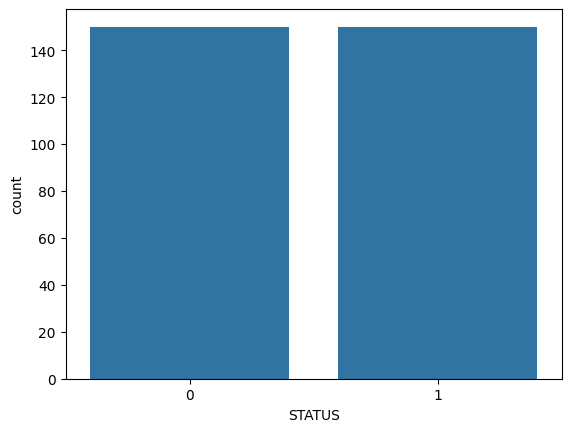

In [ ]:
# Se explora que el dataset no está balanceado
df['STATUS'].value_counts()
sns.countplot(x='STATUS',data=df)

In [ ]:
df.describe() #Descripción estadística

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,STATUS
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,181.297167,200.293703,155.990397,0.488967,0.000029,0.226373,0.248920,0.679027,3.910433,0.38827,1.499647,1.970750,3.756340,4.489027,0.013752,26.759323,0.500000
std,50.418997,58.567928,51.324796,0.512997,0.000029,0.271249,0.279781,0.813635,2.717302,0.26025,1.305179,1.546575,2.772914,3.916259,0.022488,5.260041,0.500835
min,63.818000,98.855000,47.690000,0.067000,0.000003,0.033000,0.044000,0.098000,0.852000,0.07900,0.295000,0.449000,0.683000,0.856000,0.000267,10.385000,0.000000
25%,142.880250,154.831250,122.867000,0.229750,0.000012,0.093750,0.111000,0.280250,2.108750,0.20900,0.764500,1.017500,1.831500,2.293000,0.002477,23.641500,0.000000
50%,179.294000,199.199000,155.831000,0.352500,0.000020,0.147500,0.173000,0.442500,3.091000,0.32050,1.080500,1.520500,2.938000,3.242000,0.005864,27.190500,0.500000
75%,213.257000,236.109500,189.057750,0.540000,0.000033,0.247250,0.259750,0.740750,4.738250,0.48650,1.789000,2.263750,4.777750,5.337500,0.015521,30.294750,1.000000
max,349.307000,472.387000,322.252000,5.652000,0.000237,2.887000,3.053000,8.660000,18.364000,1.56300,10.914000,9.844000,16.709000,32.741000,0.226441,38.569000,1.000000


#Métodos de selección de características

##Calculo de χ²

In [ ]:
# Variable objetivo y características
discrete_df = pd.DataFrame() #Hace que el type de discrete_df sea DF

# Discretizar todas las variables continuas
for column in df.columns:
    if df[column].dtype in ['float64']:  # Verificar si es continua (float o int)
        discrete_df[column + '_discretized'] = pd.qcut(df[column], q=9, labels=False)  # Discretizar en 9 intervalos
        #Donde 'q' se haya con la fórmula de Criterio de Sturges : q = log2(n)+1, donde n es el número de datos (300)
    else:
        discrete_df[column] = df[column]  # No discretiza

X = discrete_df.drop(columns=['STATUS'])
y = df['STATUS']

# Estandarizar los datos: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("\nX_scaled")
X_scaled.head(300)# Este no sirve porque está discretizado



X_scaled


,MDVP:Fo(Hz)_discretized,MDVP:Fhi(Hz)_discretized,MDVP:Flo(Hz)_discretized,MDVP:Jitter(%)_discretized,MDVP:Jitter(Abs)_discretized,MDVP:RAP_discretized,MDVP:PPQ_discretized,Jitter:DDP_discretized,MDVP:Shimmer_discretized,MDVP:Shimmer(dB)_discretized,Shimmer:APQ3_discretized,Shimmer:APQ5_discretized,MDVP:APQ_discretized,Shimmer:DDA_discretized,NHR_discretized,HNR_discretized
0,0.125,0.000,0.250,0.375,0.625,0.375,0.500,0.375,0.750,0.750,0.375,0.625,0.875,0.375,0.625,0.500
1,1.000,1.000,1.000,0.250,0.000,0.500,0.375,0.500,0.000,0.250,0.125,0.125,0.000,0.125,0.125,1.000
2,0.500,0.500,0.625,0.250,0.250,0.000,0.125,0.000,0.750,0.750,0.375,0.625,0.875,0.375,0.500,0.500
3,1.000,1.000,1.000,0.750,0.625,0.875,0.875,0.875,0.875,0.750,1.000,0.750,0.625,1.000,0.750,0.125
4,1.000,1.000,0.875,0.750,0.500,0.625,0.750,0.625,0.500,0.625,0.250,0.375,0.250,0.250,0.750,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.750,0.625,0.750,0.875,0.750,0.750,0.875,0.750,0.625,0.875,0.375,0.500,0.750,0.375,0.875,0.250
296,0.625,0.500,0.750,0.375,0.375,0.625,0.375,0.625,0.375,0.375,0.625,0.250,0.375,0.625,0.125,0.875
297,0.250,0.375,0.000,0.875,0.875,0.750,0.750,0.750,0.750,0.875,0.750,0.750,0.500,0.750,1.000,0.125
298,0.375,0.375,0.500,0.250,0.375,0.000,0.250,0.000,0.875,1.000,0.500,0.875,1.000,0.500,0.500,0.250


In [ ]:
# Aplicar SelectKBest con chi-cuadrado
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_scaled, y)

# Obtener y visualizar los puntajes χ²
chi2_scores = chi2_selector.scores_
feature_scores = pd.DataFrame({'Feature': X_scaled.columns, 'Chi2 Score': chi2_scores})
feature_scores = feature_scores.sort_values(by='Chi2 Score', ascending=False)
print(feature_scores)

                         Feature  Chi2 Score
9   MDVP:Shimmer(dB)_discretized    9.658863
12          MDVP:APQ_discretized    8.760417
8       MDVP:Shimmer_discretized    8.401667
11      Shimmer:APQ5_discretized    6.417362
6           MDVP:PPQ_discretized    4.737782
3     MDVP:Jitter(%)_discretized    4.681667
15               HNR_discretized    4.166667
13       Shimmer:DDA_discretized    3.803274
10      Shimmer:APQ3_discretized    3.766694
4   MDVP:Jitter(Abs)_discretized    3.058682
5           MDVP:RAP_discretized    2.922150
7         Jitter:DDP_discretized    2.811037
14               NHR_discretized    2.220417
1       MDVP:Fhi(Hz)_discretized    1.706667
2       MDVP:Flo(Hz)_discretized    0.281667
0        MDVP:Fo(Hz)_discretized    0.041667


### En base a esto se escoge las 10 características más relevantes de χ²:
Feature  Chi2                Score
-    MDVP:Shimmer(dB)_discretized    9.658863
-            MDVP:APQ_discretized    8.760417
-        MDVP:Shimmer_discretized    8.401667
-        Shimmer:APQ5_discretized    6.417362
-            MDVP:PPQ_discretized    4.737782
-      MDVP:Jitter(%)_discretized    4.681667
-                 HNR_discretized    4.166667
-         Shimmer:DDA_discretized    3.803274
-        Shimmer:APQ3_discretized    3.766694
-    MDVP:Jitter(Abs)_discretized    3.058682
-            MDVP:RAP_discretized    2.922150
-          Jitter:DDP_discretized    2.811037
-                 NHR_discretized    2.220417
-        MDVP:Fhi(Hz)_discretized    1.706667
-        MDVP:Flo(Hz)_discretized    0.281667
-         MDVP:Fo(Hz)_discretized    0.041667
  

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para χ²
X_ = df.drop(columns=['STATUS','MDVP:RAP','Jitter:DDP','NHR','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Fo(Hz)'])
y = df['STATUS']

X_CHI2 = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de χ²\n')
X_CHI2.head(10)

Dataset con las 10 primera características de χ²



,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR
0,0.042972,0.093546,0.037222,0.210427,0.260782,0.064695,0.151996,0.335143,0.065579,0.602505
1,0.033841,0.022181,0.029246,0.036775,0.083558,0.033242,0.033422,0.005429,0.034123,1.000000
2,0.029364,0.044064,0.014290,0.189641,0.266173,0.063754,0.156998,0.300200,0.064607,0.614462
3,0.091137,0.083735,0.089731,0.251599,0.248652,0.265844,0.211283,0.168539,0.266520,0.367975
4,0.068935,0.064966,0.069126,0.126999,0.216307,0.043507,0.082171,0.092225,0.044378,0.536510
5,0.034915,0.058568,0.029910,0.197979,0.216981,0.073265,0.163598,0.324286,0.074141,0.572169
6,0.069293,0.087574,0.049850,0.173995,0.196092,0.096619,0.111549,0.216211,0.097475,0.592499
7,0.027216,0.062407,0.023596,0.047225,0.052561,0.029758,0.039170,0.059778,0.030610,0.841364
8,0.031513,0.066246,0.029578,0.094906,0.111860,0.038987,0.082704,0.133907,0.039862,0.655407
9,0.021307,0.041078,0.020273,0.061215,0.061321,0.048027,0.073230,0.070448,0.048894,0.722360


##Matriz de correlación

In [ ]:
#Verificamos que df no tenga cambios
df.head(300)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,STATUS
0,125.643,133.558,123.069,0.307,0.000024,0.108,0.156,0.323,4.537,0.466,0.982,1.877,6.054,2.947,0.010018,27.366,1
1,329.405,333.374,312.627,0.256,0.000008,0.136,0.132,0.407,1.496,0.203,0.648,0.763,0.770,1.944,0.002074,38.569,1
2,178.974,188.464,161.474,0.231,0.000013,0.056,0.087,0.167,4.173,0.474,0.972,1.924,5.494,2.916,0.006188,27.703,1
3,259.635,267.378,251.415,0.576,0.000022,0.355,0.314,1.066,5.258,0.448,3.118,2.434,3.384,9.354,0.013756,20.756,0
4,252.511,268.769,199.978,0.452,0.000018,0.173,0.252,0.518,3.076,0.400,0.757,1.221,2.161,2.271,0.016546,25.506,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,207.508,215.779,185.242,0.584,0.000028,0.248,0.400,0.743,3.999,0.530,0.878,1.600,4.588,2.633,0.020672,24.434,0
296,191.532,199.113,181.134,0.313,0.000016,0.172,0.128,0.517,2.832,0.279,1.326,1.093,2.225,3.977,0.001731,31.012,1
297,140.904,168.434,70.423,0.624,0.000044,0.229,0.242,0.686,4.449,0.588,1.565,2.139,3.150,4.696,0.036226,21.981,1
298,164.828,171.071,147.525,0.250,0.000015,0.056,0.107,0.169,6.638,0.804,1.028,2.534,8.773,3.085,0.005839,25.350,1


In [ ]:
# Variable objetivo y características
X = df.drop(columns=['STATUS'])
y = df['STATUS']

# Estandarizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

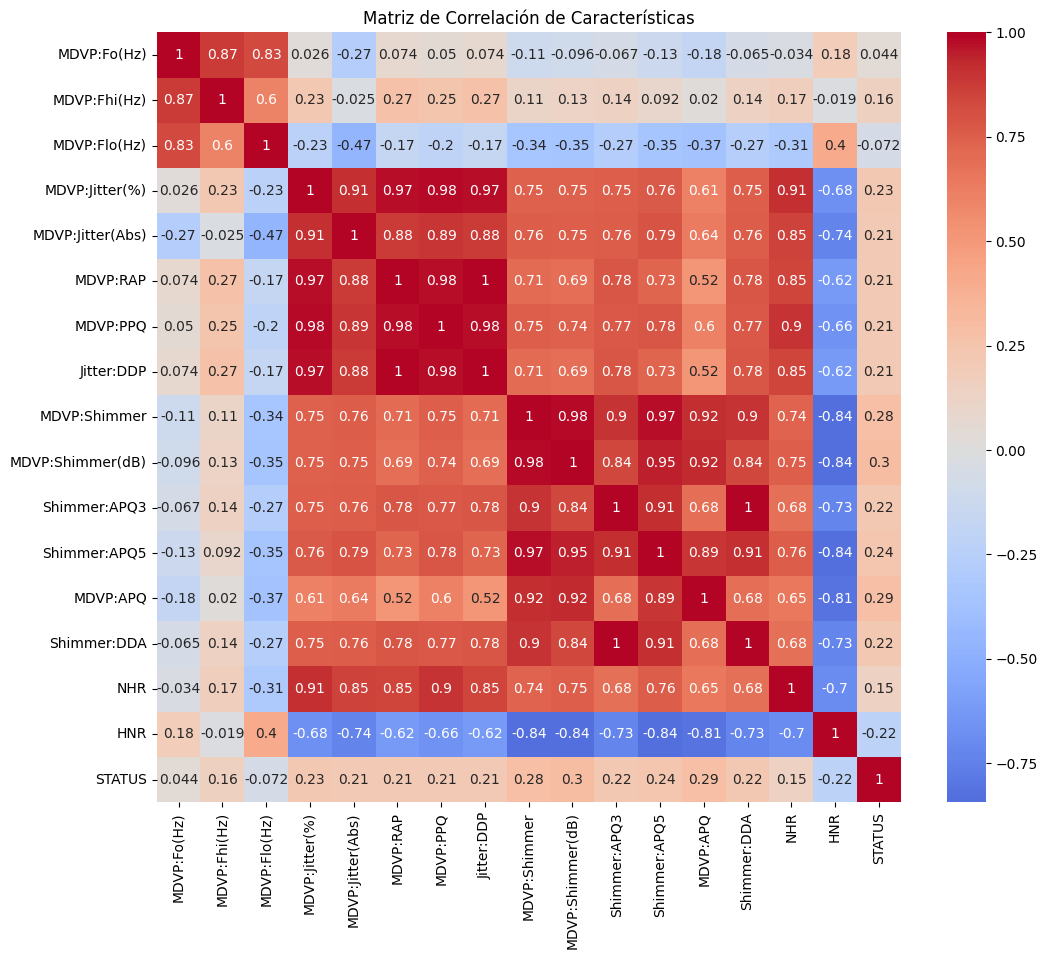

Características más correlacionadas con el objetivo:
MDVP:Shimmer(dB)    0.299584
MDVP:APQ            0.285871
MDVP:Shimmer        0.280926
Shimmer:APQ5        0.243310
MDVP:Jitter(%)      0.229051
HNR                 0.220430
Shimmer:DDA         0.219168
Shimmer:APQ3        0.216679
MDVP:RAP            0.210859
Jitter:DDP          0.210848
MDVP:PPQ            0.209179
MDVP:Jitter(Abs)    0.208652
MDVP:Fhi(Hz)        0.156224
NHR                 0.146526
MDVP:Flo(Hz)        0.072225
MDVP:Fo(Hz)         0.043816
Name: STATUS, dtype: float64


In [ ]:
# Supongamos que df es tu DataFrame original con características y 'STATUS' como la variable objetivo
X = df.drop(columns=['STATUS'])  # Elimina 'STATUS' para la estandarización
y = df['STATUS']  # Guarda 'STATUS' por separado

# Crear un scaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

# Seleccionar solo características numéricas continuas para la estandarización
numerical_features = X.select_dtypes(include=['float64'])  # Selecciona solo columnas de tipo float64

# Aplicar el scaler a las características numéricas continuas
scaled_features = scaler.fit_transform(numerical_features)

# Crear un DataFrame con las características estandarizadas
X_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Añadir la columna de 'gender' y 'STATUS' al DataFrame estandarizado
X_scaled['STATUS'] = y.values

# Calcular la matriz de correlación
correlation_matrix = X_scaled.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Características')
plt.show()

# Obtener la correlación de las características con la variable objetivo
correlation_with_target = correlation_matrix['STATUS'].abs().sort_values(ascending=False)

# Seleccionar las 10 características más correlacionadas con el objetivo
top_correlated_features = correlation_with_target[1:17]  # Excluir la correlación de 'STATUS' consigo mismo

# Imprimir las características más correlacionadas con el objetivo
print("Características más correlacionadas con el objetivo:")
print(top_correlated_features)



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para Matrix
X_ = df.drop(columns=['STATUS','MDVP:Fo(Hz)','MDVP:PPQ','MDVP:Jitter(Abs)','MDVP:Fhi(Hz)','NHR','MDVP:Flo(Hz)'])
y = df['STATUS']

X_Matrix = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de χ²\n')
X_Matrix.head(10)

Dataset con las 10 primera características de χ²



,MDVP:Jitter(%),MDVP:RAP,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR
0,0.042972,0.026279,0.026279,0.210427,0.260782,0.064695,0.151996,0.335143,0.065579,0.602505
1,0.033841,0.036090,0.036090,0.036775,0.083558,0.033242,0.033422,0.005429,0.034123,1.000000
2,0.029364,0.008059,0.008059,0.189641,0.266173,0.063754,0.156998,0.300200,0.064607,0.614462
3,0.091137,0.112824,0.113058,0.251599,0.248652,0.265844,0.211283,0.168539,0.266520,0.367975
4,0.068935,0.049054,0.049054,0.126999,0.216307,0.043507,0.082171,0.092225,0.044378,0.536510
5,0.034915,0.019622,0.019622,0.197979,0.216981,0.073265,0.163598,0.324286,0.074141,0.572169
6,0.069293,0.075333,0.075333,0.173995,0.196092,0.096619,0.111549,0.216211,0.097475,0.592499
7,0.027216,0.017870,0.017870,0.047225,0.052561,0.029758,0.039170,0.059778,0.030610,0.841364
8,0.031513,0.024877,0.024877,0.094906,0.111860,0.038987,0.082704,0.133907,0.039862,0.655407
9,0.021307,0.017870,0.017870,0.061215,0.061321,0.048027,0.073230,0.070448,0.048894,0.722360


##Clasificador Extra Trees

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Crear y ajustar el clasificador Extra Trees
clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled, y)

# Obtener la importancia de las características del clasificador Extra Trees
importancia = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': importancia
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

             Feature  Importance
16            STATUS    0.823693
12          MDVP:APQ    0.030298
8       MDVP:Shimmer    0.017540
9   MDVP:Shimmer(dB)    0.015368
1       MDVP:Fhi(Hz)    0.011983
11      Shimmer:APQ5    0.011881
15               HNR    0.011203
7         Jitter:DDP    0.010788
3     MDVP:Jitter(%)    0.009490
0        MDVP:Fo(Hz)    0.008803
13       Shimmer:DDA    0.008077
6           MDVP:PPQ    0.007920
5           MDVP:RAP    0.007458
2       MDVP:Flo(Hz)    0.007097
10      Shimmer:APQ3    0.006777
14               NHR    0.005828
4   MDVP:Jitter(Abs)    0.005796


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
             Feature  Importance
12          MDVP:APQ    0.125571
9   MDVP:Shimmer(dB)    0.115366
8       MDVP:Shimmer    0.115336
11      Shimmer:APQ5    0.076046
1       MDVP:Fhi(Hz)    0.071093
15               HNR    0.067423
0        MDVP:Fo(Hz)    0.065888
13       Shimmer:DDA    0.047175
6           MDVP:PPQ    0.047146
7         Jitter:DDP    0.044434
3     MDVP:Jitter(%)    0.042245
10      Shimmer:APQ3    0.040472
2       MDVP:Flo(Hz)    0.040360
5           MDVP:RAP    0.037713
4   MDVP:Jitter(Abs)    0.035154
14               NHR    0.028580


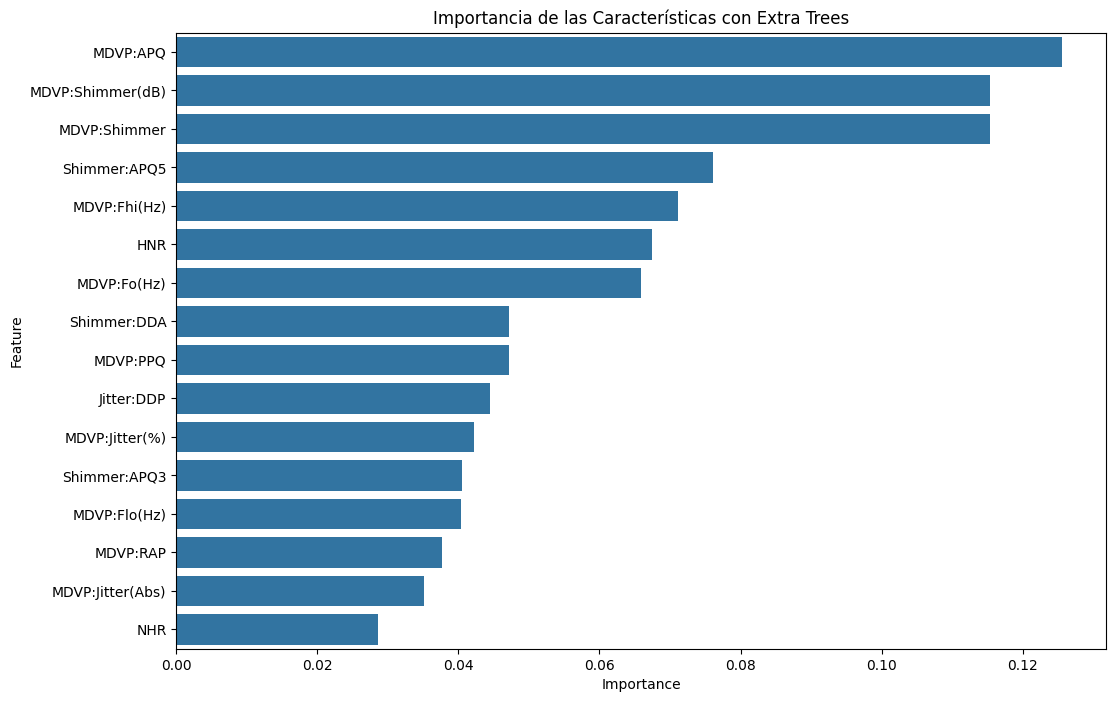

In [ ]:
# Supongamos que df es tu DataFrame original con características y 'STATUS' como la variable objetivo
X = df.drop(columns=['STATUS'])
y = df['STATUS']

# Crear un scaler con el rango deseado
scaler = MinMaxScaler(feature_range=(0, 1))

# Aplicar el scaler a todas las características numéricas excepto la columna 'gender'
numerical_features = X.select_dtypes(include=['float64'])
scaled_features = scaler.fit_transform(numerical_features)

# Crear un DataFrame con las características estandarizadas
X_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configurar la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Instanciar y ajustar la búsqueda en cuadrícula
grid = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f"Best parameters: {grid.best_params_}")

# Ajustar el clasificador con los mejores parámetros
best_clf = grid.best_estimator_

# Obtener la importancia de las características
importances = best_clf.feature_importances_

# Crear un DataFrame para visualizar la importancia
importancia_df = pd.DataFrame({
    'Feature': X_scaled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importancia_df)

# Graficar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importancia_df)
plt.title('Importancia de las Características con Extra Trees')
plt.show()


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

#Elimina la columna de STATUS ya que pertenece solo a 'y' y alimina las características menos relevantes para Tree
X_ = df.drop(columns=['STATUS','Shimmer:APQ3','MDVP:PPQ','MDVP:RAP','Jitter:DDP','MDVP:Jitter(Abs)','NHR'])
y = df['STATUS']

X_Tree = pd.DataFrame(scaler.fit_transform(X_), columns=X_.columns)
print('Dataset con las 10 primera características de Tree\n')
X_Tree.head(10)

Dataset con las 10 primera características de Tree



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,HNR
0,0.216558,0.092905,0.274543,0.042972,0.210427,0.260782,0.151996,0.335143,0.065579,0.602505
1,0.930288,0.627842,0.964944,0.033841,0.036775,0.083558,0.033422,0.005429,0.034123,1.000000
2,0.403364,0.239896,0.414420,0.029364,0.189641,0.266173,0.156998,0.300200,0.064607,0.614462
3,0.685900,0.451161,0.742000,0.091137,0.251599,0.248652,0.211283,0.168539,0.266520,0.367975
4,0.660947,0.454885,0.554658,0.068935,0.126999,0.216307,0.082171,0.092225,0.044378,0.536510
5,0.338731,0.186546,0.389970,0.034915,0.197979,0.216981,0.163598,0.324286,0.074141,0.572169
6,0.465037,0.294253,0.497130,0.069293,0.173995,0.196092,0.111549,0.216211,0.097475,0.592499
7,0.224482,0.106706,0.280723,0.027216,0.047225,0.052561,0.039170,0.059778,0.030610,0.841364
8,0.247228,0.158538,0.302810,0.031513,0.094906,0.111860,0.082704,0.133907,0.039862,0.655407
9,0.310751,0.158704,0.361488,0.021307,0.061215,0.061321,0.073230,0.070448,0.048894,0.722360


#Modelos de Machine Learning

##Arreglo de datos

###Visualización de datos

In [ ]:
print('\nX_CHI2:\n',X_CHI2.info())
print('\nX_Matrix:\n',X_Matrix.info())
print('\nX_Tree: \n',X_Tree.info())
print('\ny: \n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Jitter(%)    300 non-null    float64
 1   MDVP:Jitter(Abs)  300 non-null    float64
 2   MDVP:PPQ          300 non-null    float64
 3   MDVP:Shimmer      300 non-null    float64
 4   MDVP:Shimmer(dB)  300 non-null    float64
 5   Shimmer:APQ3      300 non-null    float64
 6   Shimmer:APQ5      300 non-null    float64
 7   MDVP:APQ          300 non-null    float64
 8   Shimmer:DDA       300 non-null    float64
 9   HNR               300 non-null    float64
dtypes: float64(10)
memory usage: 23.6 KB

X_CHI2:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Jitter(%)    300 non-null    float64
 1   MDVP:RAP          300 n

###División de Dataset

In [ ]:
X_train_CHI2, X_test_CHI2, y_train_CHI2, y_test_CHI2 = train_test_split(X_CHI2, y, test_size=0.20, random_state=42)
X_train_Matrix, X_test_Matrix, y_train_Matrix, y_test_Matrix = train_test_split(X_Matrix, y, test_size=0.20, random_state=42)
X_train_Tree, X_test_Tree, y_train_Tree, y_test_Tree = train_test_split(X_Tree, y, test_size=0.20, random_state=42)


##Árbol de Decisión

###χ²

In [ ]:
clfDTCHI2 = DecisionTreeClassifier()

In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
}
CV_dtCHI2 = GridSearchCV(estimator=clfDTCHI2, param_grid=param_grid, cv= 5)
CV_dtCHI2.fit(X_train_CHI2, y_train_CHI2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtCHI2.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'random_state': 1}

In [ ]:
dt1CHI2=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1CHI2.fit(X_train_CHI2, y_train_CHI2)
predDTCHI2 = dt1CHI2.predict(X_test_CHI2)
print(classification_report(y_test_CHI2, predDTCHI2))

# Realiza la validación cruzada K = 5
scoresdtCHI2 = cross_val_score(clfDTCHI2, X_CHI2, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scoresdtCHI2.mean(), scoresdtCHI2.std() * 2))

              precision    recall  f1-score   support

           0       0.89      0.46      0.60        35
           1       0.55      0.92      0.69        25

    accuracy                           0.65        60
   macro avg       0.72      0.69      0.65        60
weighted avg       0.75      0.65      0.64        60

Accuracy VC: 0.67 (+/- 0.07)


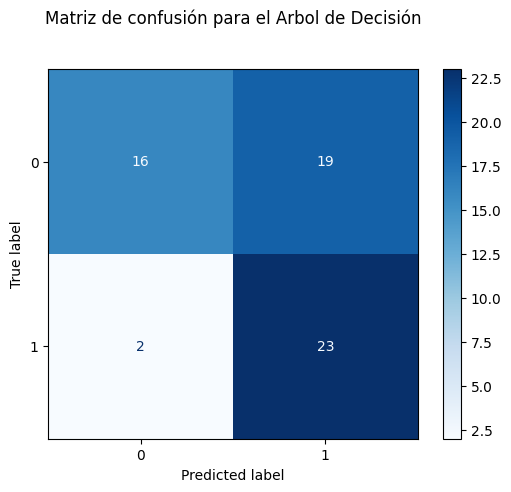

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cmDTCHI2 = ConfusionMatrixDisplay(confusion_matrix(y_test_CHI2, predDTCHI2))
cmDTCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTCHI2 = accuracy_score(y_train_CHI2, dt1CHI2.predict(X_train_CHI2))
test_accuracy_DTCHI2 = accuracy_score(y_test_CHI2, dt1CHI2.predict(X_test_CHI2))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTCHI2)
print("Precisión en el conjunto de prueba:", test_accuracy_DTCHI2)

Precisión en el conjunto de entrenamiento: 0.9
Precisión en el conjunto de prueba: 0.65


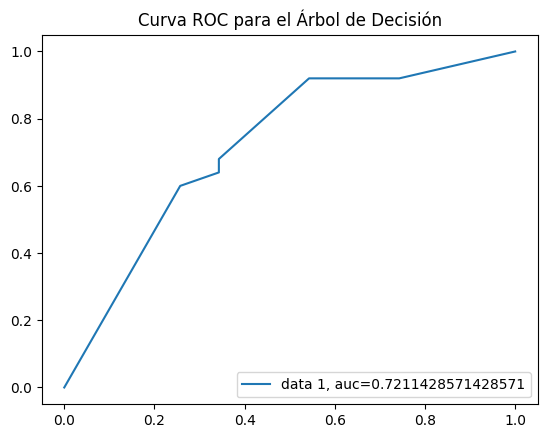

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_probaDTCHI2 = dt1CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcula la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr)
fpr_DTCHI2, tpr_DTCHI2, _ = roc_curve(y_test_CHI2, y_pred_probaDTCHI2)

# Calcula el área bajo la curva ROC (AUC)
auc_DTCHI2 = roc_auc_score(y_test_CHI2, y_pred_probaDTCHI2)

# Grafica la curva ROC
plt.plot(fpr_DTCHI2, tpr_DTCHI2, label="data 1, auc=" + str(auc_DTCHI2))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Calcular e imprimir las métricas en el conjunto de prueba
print("Reporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test_CHI2, predDTCHI2))

# Calcular la precisión en el conjunto de prueba
test_accuracy_DTCHI2 = accuracy_score(y_test_CHI2, predDTCHI2)
print("Precisión en el conjunto de prueba: %0.2f" % test_accuracy_DTCHI2)

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.89      0.46      0.60        35
           1       0.55      0.92      0.69        25

    accuracy                           0.65        60
   macro avg       0.72      0.69      0.65        60
weighted avg       0.75      0.65      0.64        60

Precisión en el conjunto de prueba: 0.65


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTCHI2, 'dtCHI2_clf.pkl')

['dtCHI2_clf.pkl']

###Matrix

In [ ]:
clfDTMatrix = DecisionTreeClassifier()

In [ ]:
clfDTMatrix.fit(X_train_Matrix, y_train_Matrix)
predDTMatrix = clfDTMatrix.predict(X_test_Matrix)
print(classification_report(y_test_Matrix, predDTMatrix))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        35
           1       0.52      0.68      0.59        25

    accuracy                           0.60        60
   macro avg       0.61      0.61      0.60        60
weighted avg       0.63      0.60      0.60        60



In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
    }
CV_dtMatrix = GridSearchCV(estimator=clfDTMatrix, param_grid=param_grid, cv= 5)
CV_dtMatrix.fit(X_train_Matrix, y_train_Matrix)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtMatrix.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'random_state': 1}

In [ ]:
dt1Matrix=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1Matrix.fit(X_train_Matrix, y_train_Matrix)
predDTMatrix = dt1Matrix.predict(X_test_Matrix)
print(classification_report(y_test_Matrix, predDTMatrix))

# Realiza la validación cruzada
scoresdtMatrix = cross_val_score(clfDTMatrix, X_Matrix, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scoresdtMatrix.mean(), scoresdtMatrix.std() * 2))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69        35
           1       0.59      0.80      0.68        25

    accuracy                           0.68        60
   macro avg       0.70      0.70      0.68        60
weighted avg       0.72      0.68      0.68        60

Accuracy VC: 0.65 (+/- 0.20)


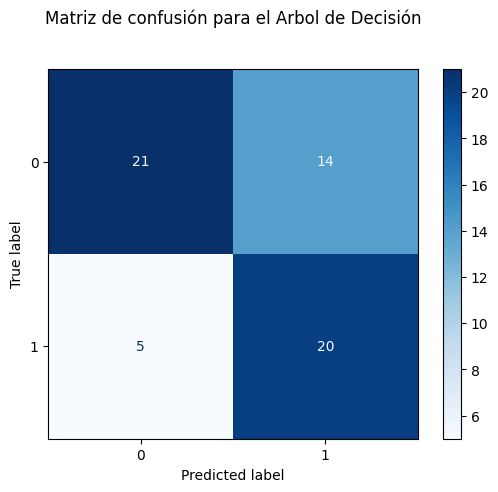

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cm_DTMatrix = ConfusionMatrixDisplay(confusion_matrix(y_test_Matrix, predDTMatrix))
cm_DTMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTMatrix = accuracy_score(y_train_Matrix, dt1Matrix.predict(X_train_Matrix))
test_accuracy_DTMatrix = accuracy_score(y_test_Matrix, dt1Matrix.predict(X_test_Matrix))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTMatrix)
print("Precisión en el conjunto de prueba:", test_accuracy_DTMatrix)

Precisión en el conjunto de entrenamiento: 0.9083333333333333
Precisión en el conjunto de prueba: 0.6833333333333333


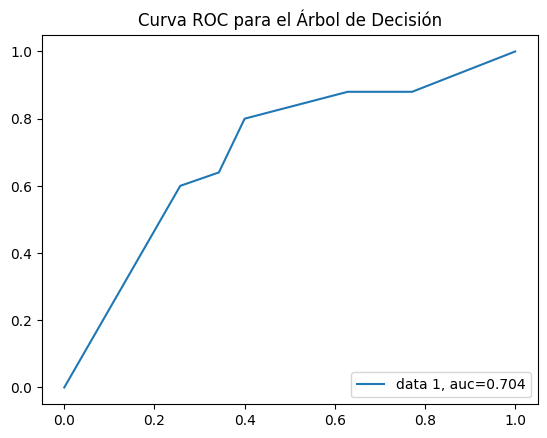

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_proba_DTMatrix = dt1Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcula la tasa de falsos positivos (fprMatrix) y la tasa de verdaderos positivos (tprMatrix)
fprDTMatrix, tprDTMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_DTMatrix)

# Calcula el área bajo la curva ROC (AUC)
aucDTMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_DTMatrix)

# Grafica la curva ROC
plt.plot(fprDTMatrix, tprDTMatrix, label="data 1, auc=" + str(aucDTMatrix))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTMatrix, 'dtMatrix_clf.pkl')

['dtMatrix_clf.pkl']

###Trees

In [ ]:
clfDTTree = DecisionTreeClassifier()
clfDTTree.fit(X_train_Tree, y_train_Tree)
predDTTree = clfDTTree.predict(X_test_Tree)
print(classification_report(y_test_Tree, predDTTree))

              precision    recall  f1-score   support

           0       0.79      0.54      0.64        35
           1       0.56      0.80      0.66        25

    accuracy                           0.65        60
   macro avg       0.67      0.67      0.65        60
weighted avg       0.69      0.65      0.65        60



In [ ]:
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [1,2,3],
    'criterion': ['gini', 'entropy'],
    }
CV_dtTree = GridSearchCV(estimator=clfDTTree, param_grid=param_grid, cv= 5)
CV_dtTree.fit(X_train_Tree, y_train_Tree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 2, 3]})

In [ ]:
CV_dtTree.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'random_state': 1}

In [ ]:
dt1Tree=DecisionTreeClassifier(random_state=34, max_features='sqrt', max_depth=8, criterion='gini')
dt1Tree.fit(X_train_Tree, y_train_Tree)
predDTTree = dt1Tree.predict(X_test_Tree)
print(classification_report(y_test_Tree, predDTTree))

# Realiza la validación cruzada
scores_DTTree = cross_val_score(clfDTTree, X_Tree, y, cv=5)  # Aquí X_features y y son tus características y etiquetas, respectivamente

# Imprime los resultados de la validación cruzada
print("Accuracy VC: %0.2f (+/- %0.2f)" % (scores_DTTree.mean(), scores_DTTree.std() * 2))

              precision    recall  f1-score   support

           0       0.62      0.46      0.52        35
           1       0.44      0.60      0.51        25

    accuracy                           0.52        60
   macro avg       0.53      0.53      0.52        60
weighted avg       0.54      0.52      0.52        60

Accuracy VC: 0.65 (+/- 0.10)


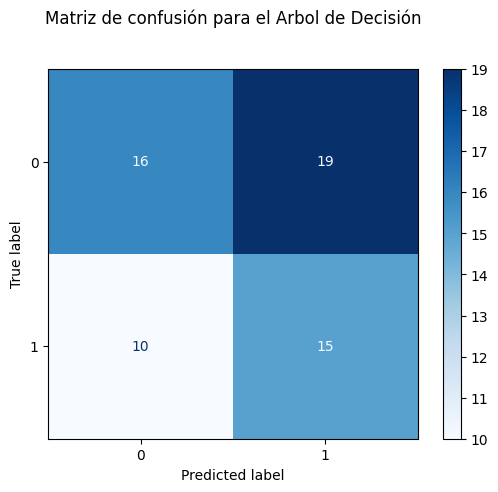

In [ ]:
#donde y_test_CHI2 son las etiquetas reales y predDtCHI2 represeta las preddiciones del modelo
cm_DTTree = ConfusionMatrixDisplay(confusion_matrix(y_test_Tree, predDTTree))
cm_DTTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para el Arbol de Decisión', y=1.1)
plt.show()

In [ ]:
# Calcular la precisión en los conjuntos de entrenamiento y prueba
train_accuracy_DTTree = accuracy_score(y_train_Tree, dt1Tree.predict(X_train_Tree))
test_accuracy_DTTree = accuracy_score(y_test_Tree, dt1Tree.predict(X_test_Tree))
# Imprimir los resultados
print("Precisión en el conjunto de entrenamiento:", train_accuracy_DTTree)
print("Precisión en el conjunto de prueba:", test_accuracy_DTTree)

Precisión en el conjunto de entrenamiento: 0.9666666666666667
Precisión en el conjunto de prueba: 0.5166666666666667


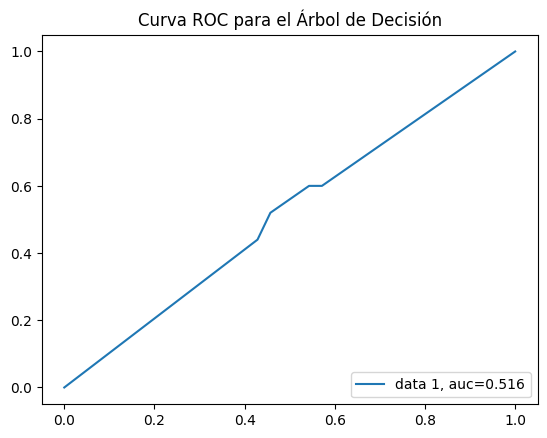

In [ ]:
# Calcula las probabilidades de las clases positivas
y_pred_proba_DTTree = dt1Tree.predict_proba(X_test_Tree)[:, 1]

# Calcula la tasa de falsos positivos (fprTree) y la tasa de verdaderos positivos (tprTree)
fprDTTree, tprDTTree, _ = roc_curve(y_test_Tree, y_pred_proba_DTTree)

# Calcula el área bajo la curva ROC (AUC)
aucDTTree = roc_auc_score(y_test_Tree, y_pred_proba_DTTree)

# Grafica la curva ROC
plt.plot(fprDTTree, tprDTTree, label="data 1, auc=" + str(aucDTTree))
plt.legend(loc=4)
plt.title('Curva ROC para el Árbol de Decisión')
plt.show()


In [ ]:
# Dumping Decision Tree Classifier
joblib.dump(predDTTree, 'dtTree_clf.pkl')

['dtTree_clf.pkl']

##KNN -K Vecinos más Cercanos

###χ²

In [ ]:
# Definir los hiperparámetros de forma manual
knn_CHI2 = KNeighborsClassifier(n_neighbors=29, weights='distance')  #{'distance', 'uniform'} Aquí puedes cambiar los valores manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(knn_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')  # 10 pliegues
cv_score_mean = cv_scores.mean()

print(f"Puntuación media de validación cruzada: {cv_score_mean:.4f}")
#print(f"Puntuaciones de validación cruzada para cada pliegue: {cv_scores}")

# Entrenar el modelo con los hiperparámetros definidos
knn_CHI2.fit(X_train_CHI2, y_train_CHI2)

Puntuación media de validación cruzada: 0.7083


KNeighborsClassifier(n_neighbors=29, weights='distance')

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_knn_CHI2 = knn_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_CHI2 = knn_CHI2.score(X_train_CHI2, y_train_CHI2)
knn_test_acc_CHI2 = knn_CHI2.score(X_test_CHI2, y_test_CHI2)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_CHI2:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_CHI2:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.6167


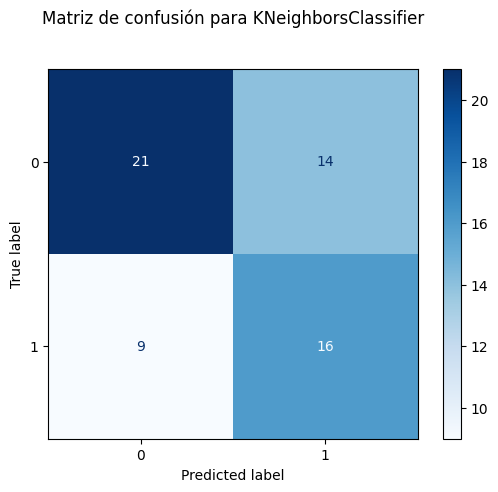


Informe de Clasificación en el Conjunto de Prueba:
               precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.53      0.64      0.58        25

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.61        60
weighted avg       0.63      0.62      0.62        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNCHI2 = confusion_matrix(y_test_CHI2, pred_knn_CHI2)
disp_KNNCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNCHI2)
disp_KNNCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nInforme de Clasificación en el Conjunto de Prueba:\n", classification_report(y_test_CHI2, pred_knn_CHI2))

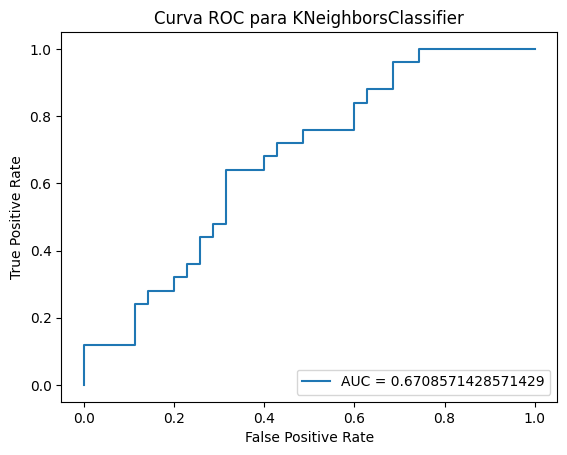

AUC: 0.6709


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNCHI2 = knn_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para la curva ROC
fpr_KNNCHI2, tpr_KNNCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_KNNCHI2)
auc_KNNCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_KNNCHI2)

# Visualización de la curva ROC
plt.figure()
plt.plot(fpr_KNNCHI2, tpr_KNNCHI2, label="AUC = " + str(auc_KNNCHI2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNCHI2:.4f}")

In [ ]:
# Guardar el modelo KNeighborsClassifier entrenado en un archivo .pkl
joblib.dump(knn_CHI2, 'knnCHI2_clf.pkl')

['knnCHI2_clf.pkl']

###Matriz

In [ ]:
# Definir manualmente los hiperparámetros seleccionados
knn_Matrix = KNeighborsClassifier(n_neighbors=29, weights='distance')  # Ajusta estos valores manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores_Matrix = cross_val_score(knn_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')  # 10 pliegues de validación cruzada
cv_mean_score_Matrix = cv_scores_Matrix.mean()

print(f"Puntuación media de validación cruzada: {cv_mean_score_Matrix:.4f}")

# Entrenar el modelo en el conjunto de entrenamiento
knn_Matrix.fit(X_train_Matrix, y_train_Matrix)

Puntuación media de validación cruzada: 0.7083


KNeighborsClassifier(n_neighbors=29, weights='distance')

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_knn_Matrix = knn_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_Matrix = knn_Matrix.score(X_train_Matrix, y_train_Matrix)
knn_test_acc_Matrix = knn_Matrix.score(X_test_Matrix,  y_test_Matrix)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_Matrix:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_Matrix:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.6333


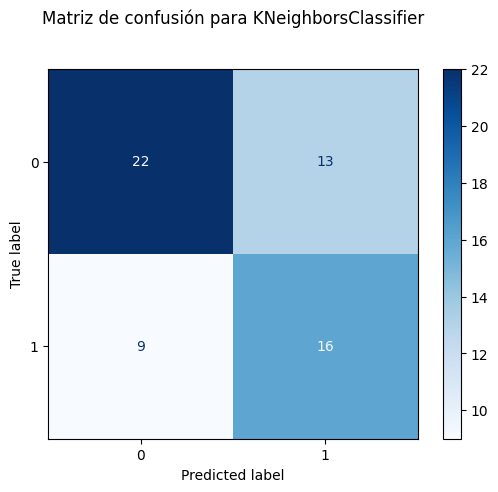


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.71      0.63      0.67        35
           1       0.55      0.64      0.59        25

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.64      0.63      0.64        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNMatrix = confusion_matrix(y_test_Matrix, pred_knn_Matrix)
disp_KNNMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNMatrix)
disp_KNNMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_knn_Matrix))

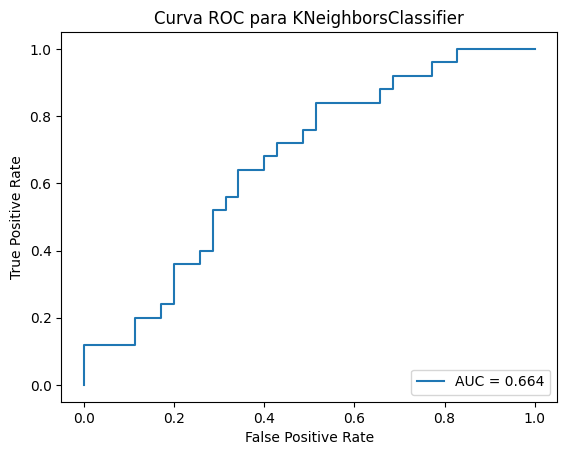

AUC: 0.6640


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNMatrix = knn_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos para la curva ROC
fpr_KNNMatrix, tpr_KNNMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_KNNMatrix)
auc_KNNMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_KNNMatrix)

# Visualización de la curva ROC
plt.plot(fpr_KNNMatrix, tpr_KNNMatrix, label="AUC = " + str(auc_KNNMatrix))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNMatrix:.4f}")

In [ ]:
# Dumping KNN Classifier
joblib.dump(pred_knn_Matrix, 'knnMatrix_clf.pkl')

['knnMatrix_clf.pkl']

###Tree

In [ ]:
# Definir el modelo KNeighborsClassifier con los hiperparámetros manuales
knn_Tree = KNeighborsClassifier(n_neighbors=9, weights='distance')  # Ajusta los hiperparámetros manualmente

# Validación cruzada en el conjunto de entrenamiento
cv_scores_Tree = cross_val_score(knn_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_Tree = cv_scores_Tree.mean()

print(f"Puntuación media de validación cruzada: {cv_mean_score_Tree:.4f}")

# Entrenar el modelo con los datos de entrenamiento
knn_Tree.fit(X_train_Tree, y_train_Tree)

Puntuación media de validación cruzada: 0.7083


KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_knn_Tree = knn_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
knn_train_acc_Tree = knn_Tree.score(X_train_Tree, y_train_Tree)
knn_test_acc_Tree = knn_Tree.score(X_test_Tree, y_test_Tree)

# Imprimir resultados
print(f"Precisión en el conjunto de entrenamiento: {knn_train_acc_Tree:.4f}")
print(f"Precisión en el conjunto de prueba: {knn_test_acc_Tree:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.6833


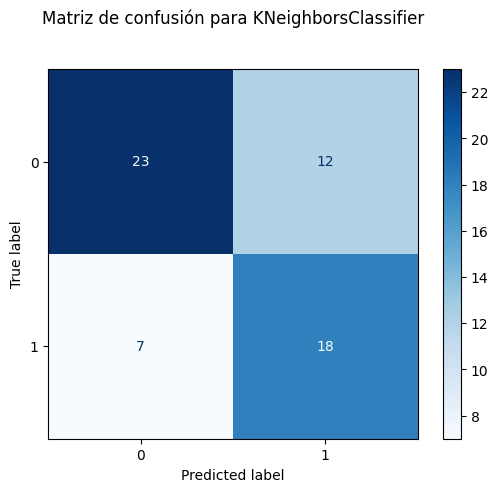


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.60      0.72      0.65        25

    accuracy                           0.68        60
   macro avg       0.68      0.69      0.68        60
weighted avg       0.70      0.68      0.69        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_KNNTree = confusion_matrix(y_test_Tree, pred_knn_Tree)
disp_KNNTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_KNNTree)
disp_KNNTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para KNeighborsClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_knn_Tree))


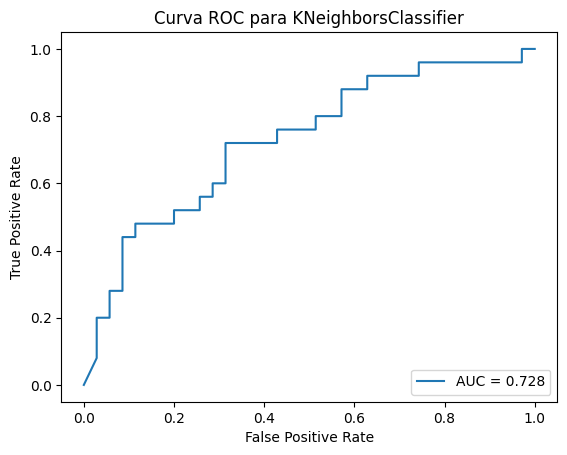

AUC: 0.7280


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_KNNTree = knn_Tree.predict_proba(X_test_Tree)[:, 1]  # Utiliza el modelo entrenado (no best_estimator)

# Calcular la curva ROC y el AUC
fpr_KNNTree, tpr_KNNTree, _ = roc_curve(y_test_Tree, y_pred_proba_KNNTree)
auc_KNNTree = roc_auc_score(y_test_Tree, y_pred_proba_KNNTree)

# Visualización de la curva ROC
plt.plot(fpr_KNNTree, tpr_KNNTree, label="AUC = " + str(auc_KNNTree))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNeighborsClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_KNNTree:.4f}")

In [ ]:
# Dumping KNN Classifier
joblib.dump(pred_knn_Tree, 'knnTree_clf.pkl')

['knnTree_clf.pkl']

##Random Forest

###χ²

In [ ]:
rfCHI2 = RandomForestClassifier(random_state=42)

In [ ]:
param_distributions_RFCHI2 = {
    'n_estimators': [1,2,3],  # Número de árboles
    'max_depth': [1,2,3],   # Profundidad máxima del árbol
    'min_samples_split': [1,2,3],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1,2,3],             # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Número de características a considerar para la mejor división
    'bootstrap': [True, False],                # Si usar o no muestreo con reemplazo
    'criterion': ['gini', 'entropy', 'log_loss']           # Función de medición de la calidad de una división
}

# Configurar RandomizedSearchCV para buscar los mejores hiperparámetros
random_search_rfCHI2 = RandomizedSearchCV(
    estimator = rfCHI2,
    param_distributions = param_distributions_RFCHI2,
    n_iter = 20,  # Número de configuraciones diferentes para probar
    scoring ='accuracy',
    cv=10,  # Validación cruzada de 10 pliegues
    verbose = 1,
    n_jobs = -1  # Usar todos los núcleos disponibles
)

# Entrenar RandomizedSearchCV
random_search_rfCHI2.fit(X_train_CHI2, y_train_CHI2)

print("Mejores parámetros encontrados:")
print(random_search_rfCHI2.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Mejores parámetros encontrados:
{'n_estimators': 1, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 1, 'criterion': 'log_loss', 'bootstrap': True}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfCHI2 = RandomForestClassifier(
    n_estimators=200,            # Número de árboles en el bosque
    max_depth=10,               # Profundidad máxima del árbol
    min_samples_split=10,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,         # Mínimo de muestras en una hoja
    max_features='log2',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=False,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfCHI2.fit(X_train_CHI2, y_train_CHI2)

# Realizar predicciones en el conjunto de prueba
pred_rf_CHI2 = rfCHI2.predict(X_test_CHI2)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfCHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = rfCHI2.score(X_test_CHI2, y_test_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfCHI2 = cross_val_score(rfCHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_rfCHI2 = cv_scores_rfCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfCHI2:.4f}")

Precisión en el conjunto de entrenamiento: 0.9667
Precisión en el conjunto de prueba: 0.6667
Precisión promedio de validación cruzada (10 pliegues): 0.6875


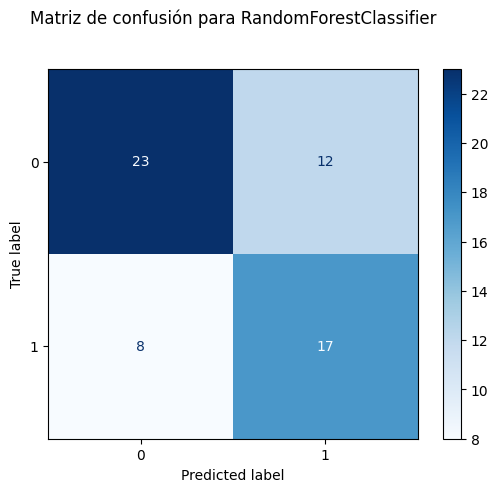


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70        35
           1       0.59      0.68      0.63        25

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.68      0.67      0.67        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFCHI2 = confusion_matrix(y_test_CHI2, pred_rf_CHI2)
disp_RFCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFCHI2)
disp_RFCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_rf_CHI2))

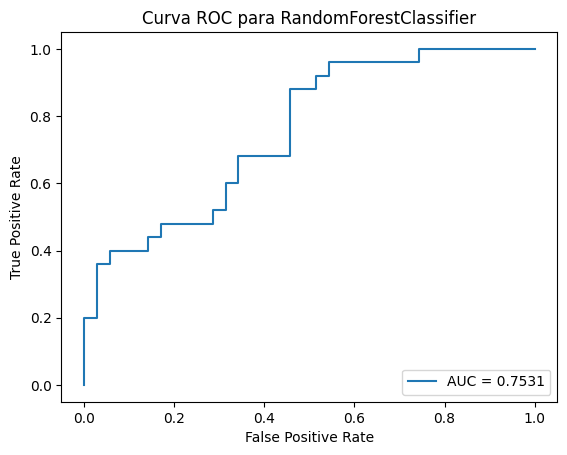

AUC: 0.7531


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfCHI2 = rfCHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_RF_CHI2, tpr_RF_CHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_rfCHI2)
auc_RF_CHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_rfCHI2)

# Visualización de la curva ROC
plt.plot(fpr_RF_CHI2, tpr_RF_CHI2, label="AUC = " + str(round(auc_RF_CHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_RF_CHI2:.4f}")



In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_CHI2, 'rfCHI2_clf.pkl')

['rfCHI2_clf.pkl']

###Matrix

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfMatrix = RandomForestClassifier(
    n_estimators=400,            # Número de árboles en el bosque
    max_depth=10,               # Profundidad máxima del árbol
    min_samples_split=10,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,         # Mínimo de muestras en una hoja
    max_features='log2',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=False,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfMatrix.fit(X_train_Matrix, y_train_Matrix)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_rf_Matrix = rfMatrix.predict(X_test_Matrix)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfMatrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_rf_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfMatrix = cross_val_score(rfMatrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_rfMatrix = cv_scores_rfMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.9542
Precisión en el conjunto de prueba: 0.6500
Precisión promedio de validación cruzada (10 pliegues): 0.6875


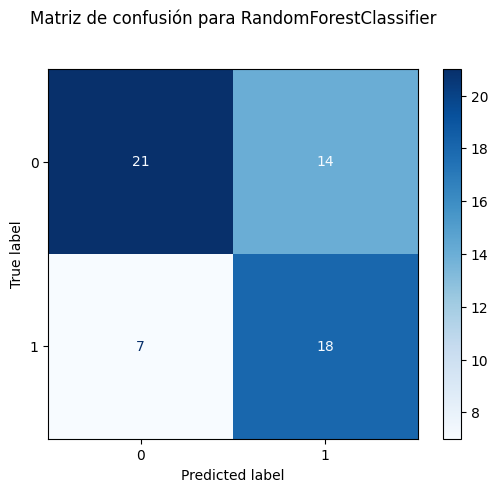


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        35
           1       0.56      0.72      0.63        25

    accuracy                           0.65        60
   macro avg       0.66      0.66      0.65        60
weighted avg       0.67      0.65      0.65        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFMatrix = confusion_matrix(y_test_Matrix, pred_rf_Matrix)
disp_RFMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFMatrix)
disp_RFMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()


# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_rf_Matrix))


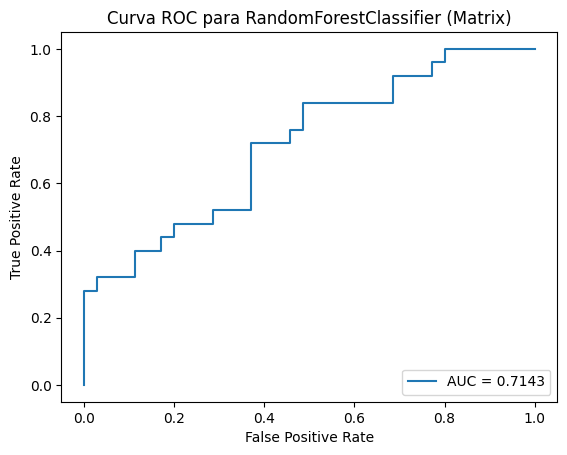

AUC: 0.7143


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfMatrix = rfMatrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_rfMatrix, tpr_rfMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_rfMatrix)
auc_rfMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_rfMatrix)

# Visualización de la curva ROC
plt.plot(fpr_rfMatrix, tpr_rfMatrix, label="AUC = " + str(round(auc_rfMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_rfMatrix:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_Matrix, 'rfMatrix_clf.pkl')

['rfMatrix_clf.pkl']

###Trees

In [ ]:
# Definir el modelo RandomForestClassifier con hiperparámetros manuales
rfTree = RandomForestClassifier(
    n_estimators=100,            # Número de árboles en el bosque
    max_depth=30,               # Profundidad máxima del árbol
    min_samples_split=10,        # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,         # Mínimo de muestras en una hoja
    max_features='log2',        # {'log2', 'sqrt'}Número de características a considerar para la mejor división
    bootstrap=True,            # Uso de muestreo con reemplazo
    criterion='gini',        # {'gini', 'entropy', 'log_loss'} Función de calidad de la división
    random_state=42             # Fijar la semilla para reproducibilidad
)

# Entrenar el modelo en el conjunto de entrenamiento
rfTree.fit(X_train_Tree, y_train_Tree)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_rf_Tree = rfTree.predict(X_test_Tree)

# Evaluar la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = rfTree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_rf_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_rfTree = cross_val_score(rfTree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_rfTree = cv_scores_rfTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_rfTree:.4f}")

Precisión en el conjunto de entrenamiento: 0.9250
Precisión en el conjunto de prueba: 0.7167
Precisión promedio de validación cruzada (10 pliegues): 0.6875


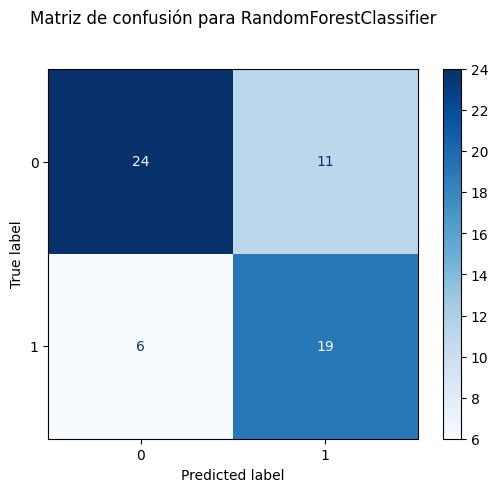


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.63      0.76      0.69        25

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.71        60
weighted avg       0.73      0.72      0.72        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_RFTree = confusion_matrix(y_test_Tree, pred_rf_Tree)
disp_RFTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_RFTree)
disp_RFTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para RandomForestClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_rf_Tree))


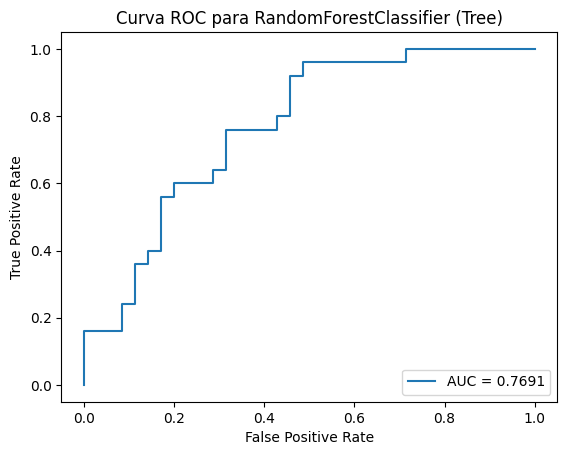

AUC: 0.7691


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_rfTree = rfTree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_rfTree, tpr_rfTree, _ = roc_curve(y_test_Tree, y_pred_proba_rfTree)
auc_rfTree = roc_auc_score(y_test_Tree, y_pred_proba_rfTree)

# Visualización de la curva ROC
plt.plot(fpr_rfTree, tpr_rfTree, label="AUC = " + str(round(auc_rfTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para RandomForestClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_rfTree:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_rf_Tree , 'rfTree_clf.pkl')

['rfTree_clf.pkl']


##Bagging

###χ²

In [ ]:
# Definir el clasificador base
DT_Regularized_BAGCHI2 = DecisionTreeClassifier(random_state=1)

# Definir el BaggingClassifier
bagging_clf_CHI2 = BaggingClassifier(estimator=DT_Regularized_BAGCHI2, random_state=42)

# Definir los hiperparámetros a explorar
param_distributions_BAGCHI2 = {
    'n_estimators': [10],
    'max_samples': [0.05],
    'max_features': [0.75],
    'bootstrap': [True, False],
    'estimator__max_depth': [1],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__min_samples_leaf':[1]
}

# Definir el GridSearchCV
random_search_BAGCHI2 = GridSearchCV(estimator=bagging_clf_CHI2, param_grid=param_distributions_BAGCHI2, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
# This is the line that is missing
random_search_BAGCHI2.fit(X_train_CHI2, y_train_CHI2) # Replace X_train and y_train with your actual training data

# Obtener los mejores hiperparámetros y el modelo
best_params = random_search_BAGCHI2.best_params_
best_bagging_clf = random_search_BAGCHI2.best_estimator_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", best_params)

# Evaluar el modelo ajustado con los mejores hiperparámetros en el conjunto de prueba
test_accuracy_BagCHI2 = best_bagging_clf.score(X_test_CHI2, y_test_CHI2)
print(f"Precisión en el conjunto de prueba con el mejor modelo: {test_accuracy_BagCHI2:.4f}")

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Mejores hiperparámetros encontrados: {'bootstrap': False, 'estimator__criterion': 'gini', 'estimator__max_depth': 1, 'estimator__min_samples_leaf': 1, 'max_features': 0.75, 'max_samples': 0.05, 'n_estimators': 10}
Precisión en el conjunto de prueba con el mejor modelo: 0.5833


In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGCHI2 = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,            # Semilla de aleatoriedad
    max_depth=1,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_CHI2 = BaggingClassifier(
    estimator=DT_Regularized_BAGCHI2,
    n_estimators=6,           # Número de modelos en el conjunto
    max_samples=0.24,           # Proporción de muestras a utilizar
    max_features=0.6,          # Proporción de características a utilizar
    bootstrap=True,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_CHI2.fit(X_train_CHI2, y_train_CHI2)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                   random_state=42),
                  max_features=0.6, max_samples=0.24, n_estimators=6,
                  random_state=42)

In [ ]:
1# Realizar predicciones en el conjunto de prueba
pred_bagging_CHI2 = bagging_clf_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_bagging_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGCHI2 = cross_val_score(bagging_clf_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_BAGCHI2 = cv_scores_BAGCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGCHI2:.4f}")

Precisión en el conjunto de entrenamiento: 0.7250
Precisión en el conjunto de prueba: 0.6667
Precisión promedio de validación cruzada (10 pliegues): 0.7000


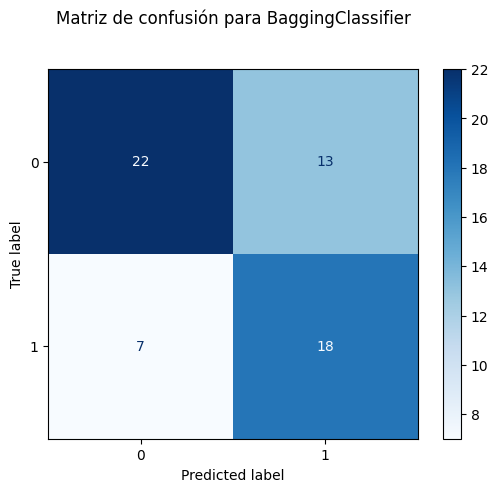


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.76      0.63      0.69        35
           1       0.58      0.72      0.64        25

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.68      0.67      0.67        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_BAGCHI2 = confusion_matrix(y_test_CHI2, pred_bagging_CHI2)
disp_BAGCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGCHI2)
disp_BAGCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para BaggingClassifier', y=1.1)
plt.savefig('confusion_matrix.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_bagging_CHI2))

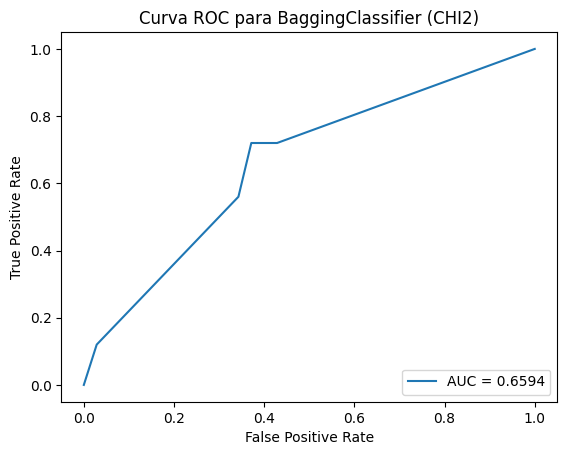

AUC: 0.6594


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_BAGCHI2 = bagging_clf_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGCHI2, tpr_BAGCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_BAGCHI2)
auc_BAGCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_BAGCHI2)

# Visualización de la curva ROC
plt.plot(fpr_BAGCHI2, tpr_BAGCHI2, label="AUC = " + str(round(auc_BAGCHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGCHI2:.4f}")



In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_CHI2, 'best_bagging_clf_CHI2.pkl')

['best_bagging_clf_CHI2.pkl']

###Matrix

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGMatrix = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,            # Semilla de aleatoriedad
    max_depth=1,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_Matrix = BaggingClassifier(
    estimator=DT_Regularized_BAGMatrix,
    n_estimators=6,           # Número de modelos en el conjunto
    max_samples=0.24,           # Proporción de muestras a utilizar
    max_features=0.6,          # Proporción de características a utilizar
    bootstrap=True,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_Matrix.fit(X_train_Matrix, y_train_Matrix)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                   random_state=42),
                  max_features=0.6, max_samples=0.24, n_estimators=6,
                  random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_bagging_Matrix = bagging_clf_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_bagging_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGMatrix = cross_val_score(bagging_clf_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_BAGMatrix = cv_scores_BAGMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.7292
Precisión en el conjunto de prueba: 0.6667
Precisión promedio de validación cruzada (10 pliegues): 0.6875


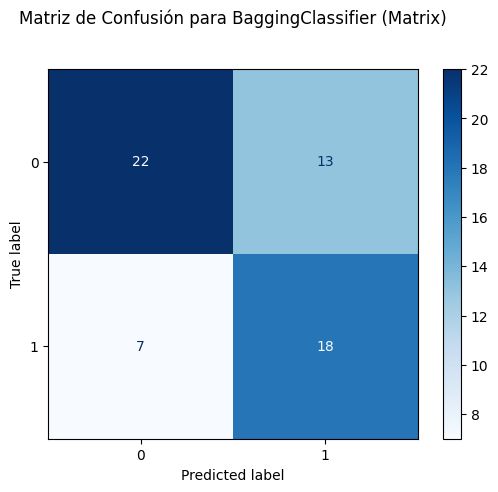


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.76      0.63      0.69        35
           1       0.58      0.72      0.64        25

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.68      0.67      0.67        60



In [ ]:
conf_matrix_BAGMatrix = confusion_matrix(y_test_Matrix, pred_bagging_Matrix)
disp_BAGMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGMatrix)
disp_BAGMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para BaggingClassifier (Matrix)', y=1.1)
plt.savefig('confusion_matrix_BAGMatrix.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_bagging_Matrix))


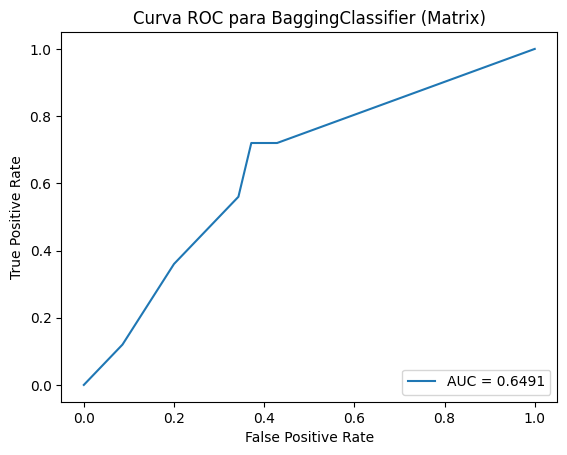

AUC: 0.6491


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_BAGMatrix = bagging_clf_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGMatrix, tpr_BAGMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_BAGMatrix)
auc_BAGMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_BAGMatrix)

# Visualización de la curva ROC
plt.plot(fpr_BAGMatrix, tpr_BAGMatrix, label="AUC = " + str(round(auc_BAGMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGMatrix:.4f}")


In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_Matrix, 'best_bagging_clf_Matrix.pkl')

['best_bagging_clf_Matrix.pkl']

###Tree

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
DT_Regularized_BAGTree = DecisionTreeClassifier(
    criterion='gini',        # gini  entropy Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=8,                # Profundidad máxima del árbol
    min_samples_leaf=1          # Mínimo de muestras en una hoja
)

# Definir el BaggingClassifier con hiperparámetros específicos
bagging_clf_Tree = BaggingClassifier(
    estimator=DT_Regularized_BAGTree,
    n_estimators=43,           # Número de modelos en el conjunto
    max_samples=0.58,           # Proporción de muestras a utilizar
    max_features=0.62,          # Proporción de características a utilizar
    bootstrap=False,             # Si usar o no muestreo con reemplazo
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo BaggingClassifier en el conjunto de entrenamiento
bagging_clf_Tree.fit(X_train_Tree, y_train_Tree)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(max_depth=8,
                                                   random_state=42),
                  max_features=0.62, max_samples=0.58, n_estimators=43,
                  random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_bagging_Tree = bagging_clf_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = bagging_clf_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_bagging_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_BAGTree = cross_val_score(bagging_clf_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_BAGTree = cv_scores_BAGTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_BAGTree:.4f}")

Precisión en el conjunto de entrenamiento: 0.9917
Precisión en el conjunto de prueba: 0.6500
Precisión promedio de validación cruzada (10 pliegues): 0.6792


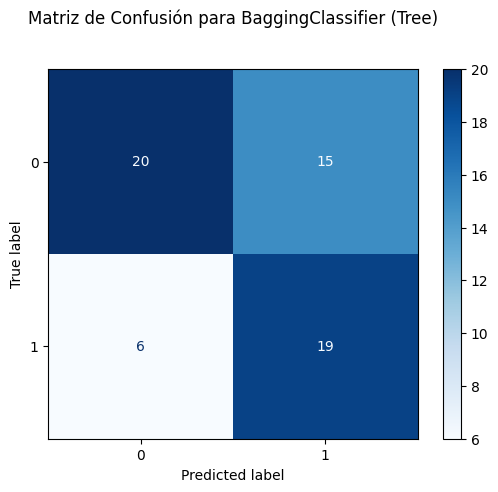


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.77      0.57      0.66        35
           1       0.56      0.76      0.64        25

    accuracy                           0.65        60
   macro avg       0.66      0.67      0.65        60
weighted avg       0.68      0.65      0.65        60



In [ ]:
# Calcular y mostrar la matriz de confusión
conf_matrix_BAGTree = confusion_matrix(y_test_Tree, pred_bagging_Tree)
disp_BAGTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_BAGTree)
disp_BAGTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para BaggingClassifier (Tree)', y=1.1)
plt.savefig('confusion_matrix_BAGTree.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_bagging_Tree))

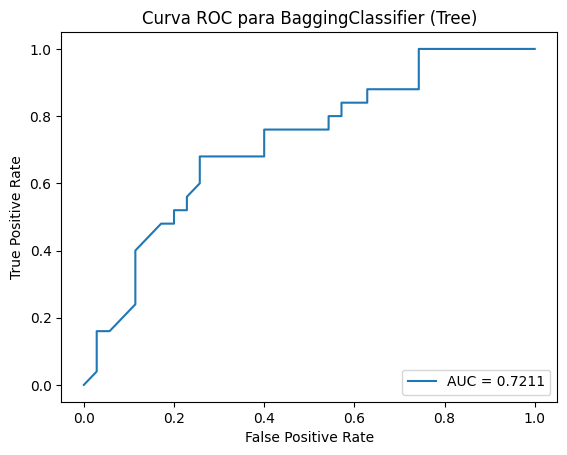

AUC: 0.7211


In [ ]:
y_pred_proba_BAGTree = bagging_clf_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_BAGTree, tpr_BAGTree, _ = roc_curve(y_test_Tree, y_pred_proba_BAGTree)
auc_BAGTree = roc_auc_score(y_test_Tree, y_pred_proba_BAGTree)

# Visualización de la curva ROC
plt.plot(fpr_BAGTree, tpr_BAGTree, label="AUC = " + str(round(auc_BAGTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para BaggingClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_BAGTree:.4f}")

In [ ]:
# Guardar el modelo
joblib.dump(pred_bagging_Tree, 'best_bagging_clf_Tree.pkl')

['best_bagging_clf_Tree.pkl']

##ADABoost

###χ²

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADACHI2 = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=8,                # Profundidad máxima del árbol base
    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_CHI2 = AdaBoostClassifier(
    estimator=tree_ADACHI2,
    n_estimators=25,           # 25 Número de clasificadores base
    learning_rate=0.78,          # Tasa de aprendizaje
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_CHI2.fit(X_train_CHI2, y_train_CHI2)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   learning_rate=0.78, n_estimators=25, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_CHI2 = ada_boost_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_ada_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADACHI2 = cross_val_score(ada_boost_CHI2, X_train_CHI2, y_train_CHI2, cv=3, scoring='accuracy')
cv_mean_score_ADACHI2 = cv_scores_ADACHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADACHI2:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.6167
Precisión promedio de validación cruzada (3 pliegues): 0.6083


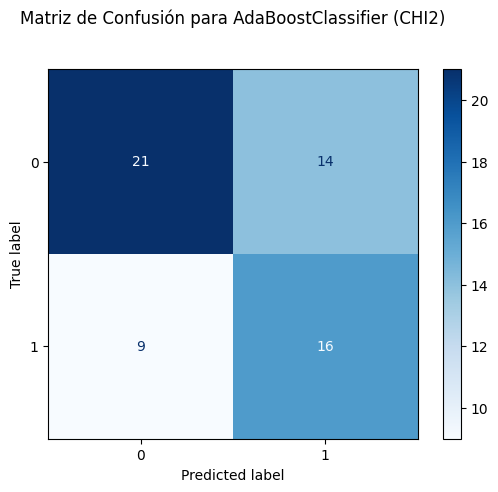


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.70      0.60      0.65        35
           1       0.53      0.64      0.58        25

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.61        60
weighted avg       0.63      0.62      0.62        60



In [ ]:
# Calcular y mostrar la matriz de confusión
conf_matrix_ADACHI2 = confusion_matrix(y_test_CHI2, pred_ada_CHI2)
disp_ADACHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADACHI2)
disp_ADACHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para AdaBoostClassifier (CHI2)', y=1.1)
plt.savefig('confusion_matrix_ADACHI2.png')  # Guardar la matriz de confusión como imagen
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_ada_CHI2))

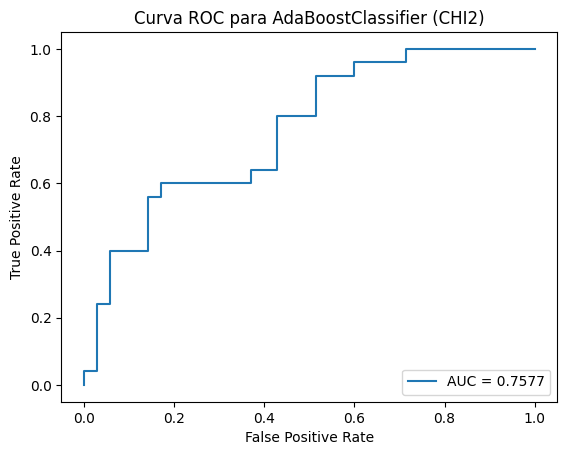

AUC: 0.7577


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADACHI2 = ada_boost_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADACHI2, tpr_ADACHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_ADACHI2)
auc_ADACHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_ADACHI2)

# Visualización de la curva ROC
plt.plot(fpr_ADACHI2, tpr_ADACHI2, label="AUC = " + str(round(auc_ADACHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADACHI2:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_CHI2 , 'ADABoostCHI2_clf.pkl')

['ADABoostCHI2_clf.pkl']

###Matriz

In [ ]:
## Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
#tree_ADAMatrix = DecisionTreeClassifier(
#    criterion='gini',        # Función de calidad de la división
#    random_state=42,             # Semilla de aleatoriedad
#    max_depth=8,                # Profundidad máxima del árbol base
#    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
#)
#
## Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
#ada_boost_Matrix = AdaBoostClassifier(
#    estimator=tree_ADAMatrix,
#    n_estimators=25,           # Número de clasificadores base
#    learning_rate=0.78,          # Tasa de aprendizaje
#    random_state=42             # Semilla de aleatoriedad
#)
#
## Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
#ada_boost_Matrix.fit(X_train_Matrix, y_train_Matrix)

# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADAMatrix = DecisionTreeClassifier(
    criterion='entropy',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=7,                # Profundidad máxima del árbol base
    min_samples_leaf=2          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_Matrix = AdaBoostClassifier(
    estimator=tree_ADAMatrix,
    n_estimators=97,           # Número de clasificadores base
    learning_rate=0.47,          # Tasa de aprendizaje
    random_state=42             # Semilla de aleatoriedad
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_Matrix.fit(X_train_Matrix, y_train_Matrix)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=7,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   learning_rate=0.47, n_estimators=97, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_Matrix= ada_boost_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_ada_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADAMatrix = cross_val_score(ada_boost_Matrix, X_train_Matrix, y_train_Matrix, cv=3, scoring='accuracy')
cv_mean_score_ADAMatrix = cv_scores_ADAMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADAMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.6500
Precisión promedio de validación cruzada (3 pliegues): 0.6542


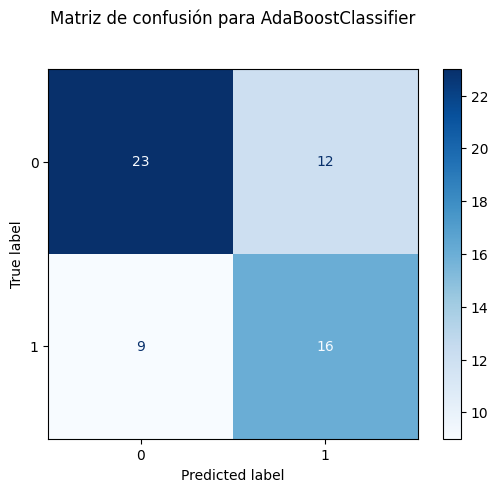


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69        35
           1       0.57      0.64      0.60        25

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_ADAMatrix = confusion_matrix(y_test_Matrix, pred_ada_Matrix)
disp_ADAMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADAMatrix)
disp_ADAMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para AdaBoostClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_ada_Matrix))

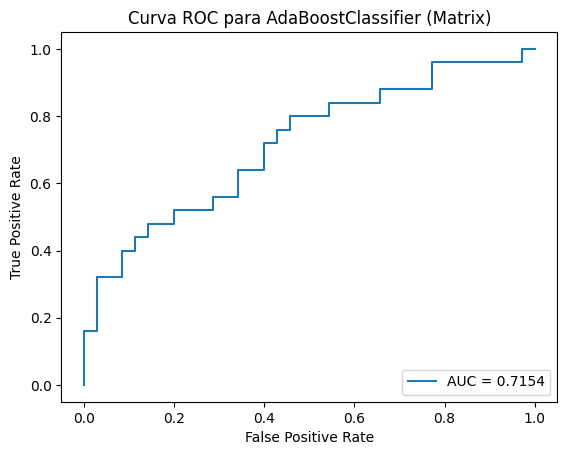

AUC: 0.7154


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADAMatrix = ada_boost_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADAMatrix, tpr_ADAMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_ADAMatrix)
auc_ADAMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_ADAMatrix)

# Visualización de la curva ROC
plt.plot(fpr_ADAMatrix, tpr_ADAMatrix, label="AUC = " + str(round(auc_ADAMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADAMatrix:.4f}")


In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_Matrix , 'ADABoostMatrix_clf.pkl')

['ADABoostMatrix_clf.pkl']

###Tree

In [ ]:
# Definir el clasificador base DecisionTreeClassifier con hiperparámetros específicos
tree_ADATree = DecisionTreeClassifier(
    criterion='gini',        # Función de calidad de la división
    random_state=42,             # Semilla de aleatoriedad
    max_depth=4,                # Profundidad máxima del árbol base
    min_samples_leaf=1          # Mínimo de muestras en una hoja del árbol base
)

# Crear el modelo AdaBoostClassifier usando el clasificador base DecisionTreeClassifier
ada_boost_Tree = AdaBoostClassifier(
    estimator=tree_ADATree,
    n_estimators=200,           # Número de clasificadores     basen_estimators=200,
    learning_rate=0.75,          # Tasa de aprendizaje         learning_rate=1.00,
    random_state=42             # Semilla de aleatoriedad      random_state=42
)

# Entrenar el modelo AdaBoostClassifier en el conjunto de entrenamiento
ada_boost_Tree.fit(X_train_Tree, y_train_Tree)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=42),
                   learning_rate=0.75, n_estimators=200, random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_ada_Tree = ada_boost_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = ada_boost_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_ada_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_ADATree = cross_val_score(ada_boost_Tree, X_train_Tree, y_train_Tree, cv=3, scoring='accuracy')
cv_mean_score_ADATree = cv_scores_ADATree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (3 pliegues): {cv_mean_score_ADATree:.4f}")

Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.7000
Precisión promedio de validación cruzada (3 pliegues): 0.6500


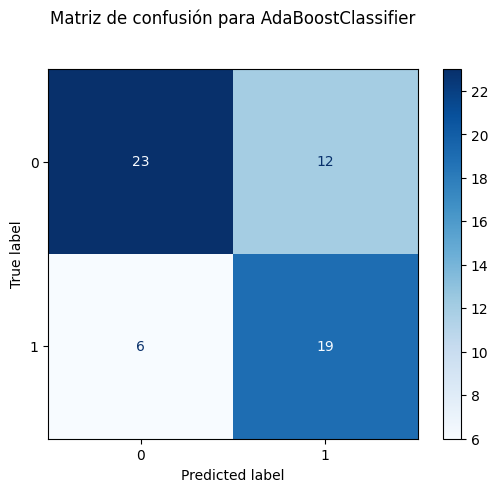


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.61      0.76      0.68        25

    accuracy                           0.70        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.72      0.70      0.70        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_ADATree = confusion_matrix(y_test_Tree, pred_ada_Tree)
disp_ADATree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ADATree)
disp_ADATree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para AdaBoostClassifier', y=1.1)
plt.show()


# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_ada_Tree))

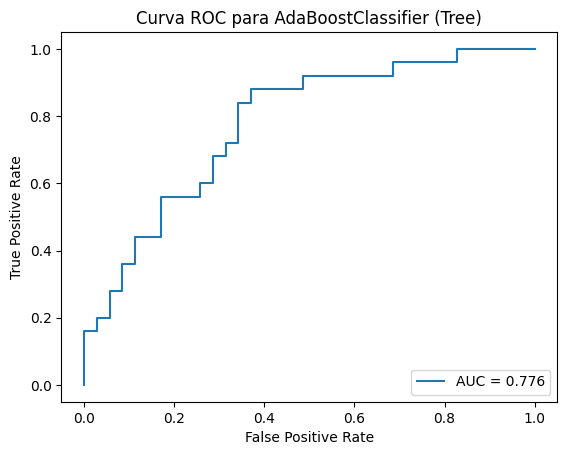

AUC: 0.7760


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_ADATree = ada_boost_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_ADATree, tpr_ADATree, _ = roc_curve(y_test_Tree, y_pred_proba_ADATree)
auc_ADATree = roc_auc_score(y_test_Tree, y_pred_proba_ADATree)

# Visualización de la curva ROC
plt.plot(fpr_ADATree, tpr_ADATree, label="AUC = " + str(round(auc_ADATree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para AdaBoostClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_ADATree:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_ada_Tree , 'ADABoostTree_clf.pkl')

['ADABoostTree_clf.pkl']

##Gradient Boosting

###χ²

In [ ]:
## Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
#gb_CHI2 = GradientBoostingClassifier(
#    n_estimators=100,             # Número de clasificadores base
#    learning_rate=0.05,            # Tasa de aprendizaje
#    max_depth=5,                  # Profundidad máxima de los árboles
#    min_samples_split=5,         # Mínimo de muestras para dividir un nodo
#    min_samples_leaf=2,           # Mínimo de muestras en una hoja
#    subsample=1,                # Fracción de muestras para entrenar cada árbol
#    max_features='sqrt',          # 'sqrt', 'log2' Características para dividir el nodo
#    random_state=42               # Semilla de aleatoriedad
#)
#
## Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
#gb_CHI2.fit(X_train_CHI2, y_train_CHI2)

# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_CHI2 = GradientBoostingClassifier(
    n_estimators=300,             # Número de clasificadores base
    learning_rate=0.01,            # Tasa de aprendizaje
    max_depth=4,                  # Profundidad máxima de los árboles
    min_samples_split=16,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,           # Mínimo de muestras en una hoja
    subsample=1,                # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_CHI2.fit(X_train_CHI2, y_train_CHI2)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           min_samples_leaf=4, min_samples_split=16,
                           n_estimators=300, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_CHI2 = gb_CHI2.predict(X_test_CHI2)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_CHI2.score(X_train_CHI2, y_train_CHI2)
test_accuracy = accuracy_score(y_test_CHI2, pred_gb_CHI2)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBCHI2 = cross_val_score(gb_CHI2, X_train_CHI2, y_train_CHI2, cv=10, scoring='accuracy')
cv_mean_score_GBCHI2 = cv_scores_GBCHI2.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBCHI2:.4f}")


Precisión en el conjunto de entrenamiento: 0.9292
Precisión en el conjunto de prueba: 0.6500
Precisión promedio de validación cruzada (10 pliegues): 0.7208


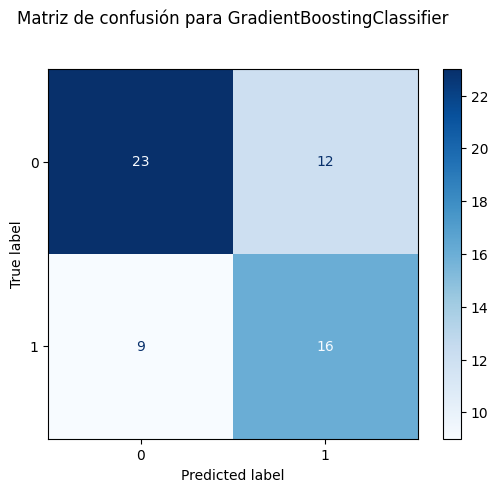


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69        35
           1       0.57      0.64      0.60        25

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBCHI2 = confusion_matrix(y_test_CHI2, pred_gb_CHI2)
disp_GBCHI2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBCHI2)
disp_GBCHI2.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_CHI2, pred_gb_CHI2))

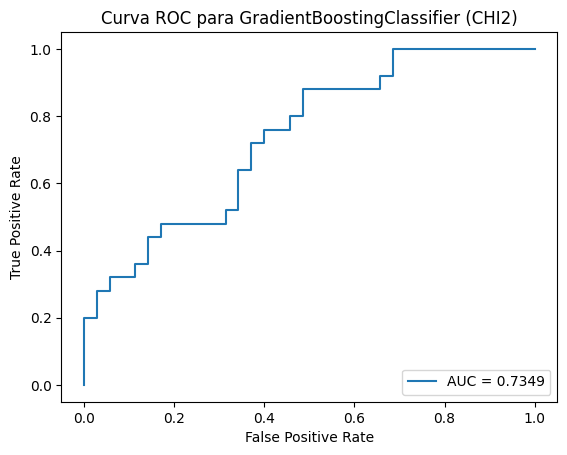

AUC: 0.7348571428571429


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBCHI2 = gb_CHI2.predict_proba(X_test_CHI2)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBCHI2, tpr_GBCHI2, _ = roc_curve(y_test_CHI2, y_pred_proba_GBCHI2)
auc_GBCHI2 = roc_auc_score(y_test_CHI2, y_pred_proba_GBCHI2)

# Visualización de la curva ROC
plt.plot(fpr_GBCHI2, tpr_GBCHI2, label="AUC = " + str(round(auc_GBCHI2, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (CHI2)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBCHI2}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_CHI2 , 'GB_clf_CHI2.pkl')

['GB_clf_CHI2.pkl']

###Matriz

In [ ]:
# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_Matrix = GradientBoostingClassifier(
    n_estimators=300,             # Número de clasificadores base
    learning_rate=0.01,            # Tasa de aprendizaje
    max_depth=4,                  # Profundidad máxima de los árboles
    min_samples_split=16,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=4,           # Mínimo de muestras en una hoja
    subsample=1,                # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_Matrix.fit(X_train_Matrix, y_train_Matrix)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2',
                           min_samples_leaf=4, min_samples_split=16,
                           n_estimators=300, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_Matrix = gb_Matrix.predict(X_test_Matrix)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_Matrix.score(X_train_Matrix, y_train_Matrix)
test_accuracy = accuracy_score(y_test_Matrix, pred_gb_Matrix)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBMatrix = cross_val_score(gb_Matrix, X_train_Matrix, y_train_Matrix, cv=10, scoring='accuracy')
cv_mean_score_GBMatrix = cv_scores_GBMatrix.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBMatrix:.4f}")

Precisión en el conjunto de entrenamiento: 0.9083
Precisión en el conjunto de prueba: 0.6500
Precisión promedio de validación cruzada (10 pliegues): 0.7125


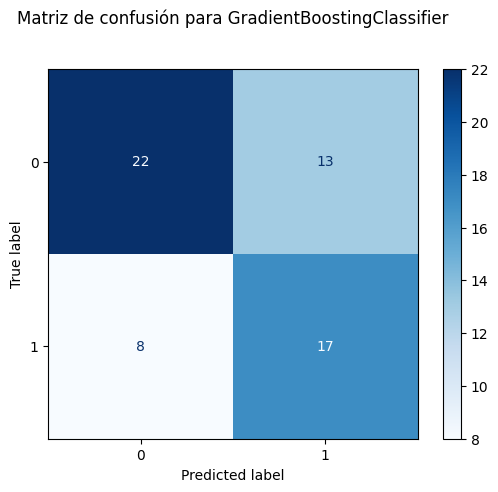


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.73      0.63      0.68        35
           1       0.57      0.68      0.62        25

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBMatrix = confusion_matrix(y_test_Matrix, pred_gb_Matrix)
disp_GBMatrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBMatrix)
disp_GBMatrix.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Matrix, pred_gb_Matrix))

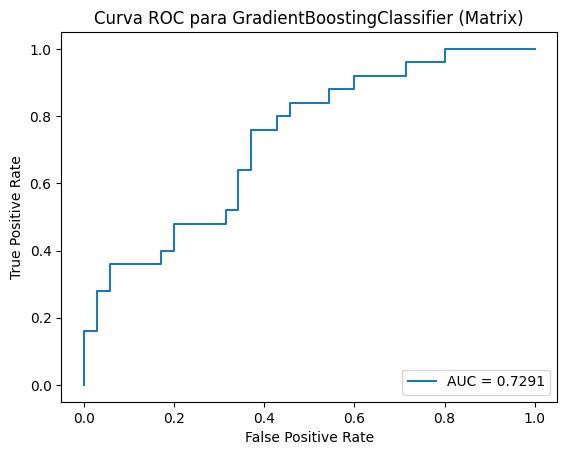

AUC: 0.7291


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBMatrix = gb_Matrix.predict_proba(X_test_Matrix)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBMatrix, tpr_GBMatrix, _ = roc_curve(y_test_Matrix, y_pred_proba_GBMatrix)
auc_GBMatrix = roc_auc_score(y_test_Matrix, y_pred_proba_GBMatrix)

# Visualización de la curva ROC
plt.plot(fpr_GBMatrix, tpr_GBMatrix, label="AUC = " + str(round(auc_GBMatrix, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (Matrix)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBMatrix:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_Matrix , 'GB_clf_Matrix.pkl')

['GB_clf_Matrix.pkl']

###Tree

In [ ]:
# Crear el modelo base GradientBoostingClassifier con hiperparámetros específicos
gb_Tree = GradientBoostingClassifier(

    #n_estimators=500,             # Número de clasificadores base
    #learning_rate=0.63,           # Tasa de aprendizaje
    #max_depth=5,                  # Profundidad máxima de los árboles
    #min_samples_split=7,         # Mínimo de muestras para dividir un nodo
    #min_samples_leaf=10,          # Mínimo de muestras en una hoja
    #subsample=1,                  # Fracción de muestras para entrenar cada árbol
    #max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    #random_state=42               # Semilla de aleatoriedad
    n_estimators=500,             # Número de clasificadores base
    learning_rate=0.63,           # Tasa de aprendizaje
    max_depth=5,                  # Profundidad máxima de los árboles
    min_samples_split=6,         # Mínimo de muestras para dividir un nodo
    min_samples_leaf=10,          # Mínimo de muestras en una hoja
    subsample=1,                  # Fracción de muestras para entrenar cada árbol
    max_features='log2',          # 'sqrt', 'log2' Características para dividir el nodo
    random_state=42               # Semilla de aleatoriedad
)

# Entrenar el modelo GradientBoostingClassifier en el conjunto de entrenamiento
gb_Tree.fit(X_train_Tree, y_train_Tree)

GradientBoostingClassifier(learning_rate=0.63, max_depth=5, max_features='log2',
                           min_samples_leaf=10, min_samples_split=6,
                           n_estimators=500, random_state=42, subsample=1)

In [ ]:
# Realizar predicciones en el conjunto de prueba
pred_gb_Tree = gb_Tree.predict(X_test_Tree)

# Calcular la precisión en el conjunto de entrenamiento y en el conjunto de prueba
train_accuracy = gb_Tree.score(X_train_Tree, y_train_Tree)
test_accuracy = accuracy_score(y_test_Tree, pred_gb_Tree)

# Validación cruzada en el conjunto de entrenamiento
cv_scores_GBTree = cross_val_score(gb_Tree, X_train_Tree, y_train_Tree, cv=10, scoring='accuracy')
cv_mean_score_GBTree = cv_scores_GBTree.mean()

# Imprimir los resultados de precisión
print(f"Precisión en el conjunto de entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión promedio de validación cruzada (10 pliegues): {cv_mean_score_GBTree:.4f}")


Precisión en el conjunto de entrenamiento: 1.0000
Precisión en el conjunto de prueba: 0.6500
Precisión promedio de validación cruzada (10 pliegues): 0.6750


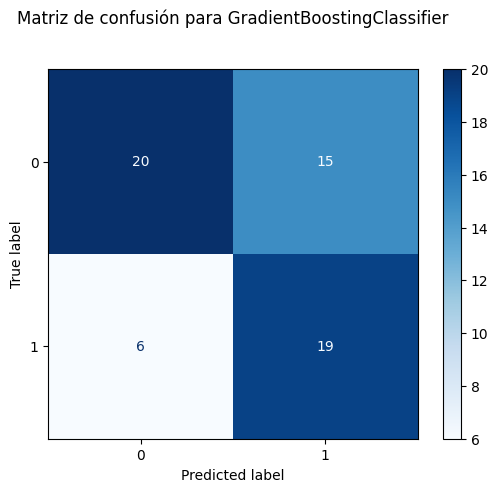


Classification Report en el conjunto de prueba:
               precision    recall  f1-score   support

           0       0.77      0.57      0.66        35
           1       0.56      0.76      0.64        25

    accuracy                           0.65        60
   macro avg       0.66      0.67      0.65        60
weighted avg       0.68      0.65      0.65        60



In [ ]:
# Imprimir la matriz de confusión
conf_matrix_GBTree = confusion_matrix(y_test_Tree, pred_gb_Tree)
disp_GBTree = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_GBTree)
disp_GBTree.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión para GradientBoostingClassifier', y=1.1)
plt.show()

# Imprimir el informe de clasificación en el conjunto de prueba
print("\nClassification Report en el conjunto de prueba:\n", classification_report(y_test_Tree, pred_gb_Tree))

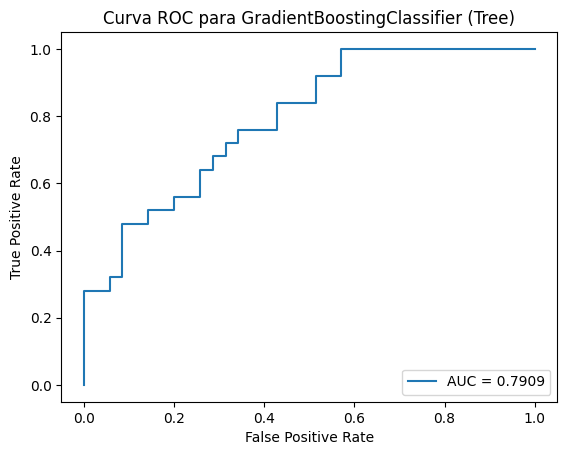

AUC: 0.7909


In [ ]:
# Calcular las probabilidades de predicción para la clase positiva
y_pred_proba_GBTree = gb_Tree.predict_proba(X_test_Tree)[:, 1]

# Calcular la curva ROC y el AUC
fpr_GBTree, tpr_GBTree, _ = roc_curve(y_test_Tree, y_pred_proba_GBTree)
auc_GBTree = roc_auc_score(y_test_Tree, y_pred_proba_GBTree)

# Visualización de la curva ROC
plt.plot(fpr_GBTree, tpr_GBTree, label="AUC = " + str(round(auc_GBTree, 4)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para GradientBoostingClassifier (Tree)')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f"AUC: {auc_GBTree:.4f}")

In [ ]:
# Dumping Random Forest Classifier
joblib.dump(pred_gb_Tree , 'GB_clf_Tree.pkl')

['GB_clf_Tree.pkl']

#Tabla de comparación

In [ ]:
chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score", "VC"],
        'DT_CHI2':[accuracy_score(y_test_CHI2, predDTCHI2), f1_score(y_test_CHI2, predDTCHI2), recall_score(y_test_CHI2, predDTCHI2), precision_score(y_test_CHI2, predDTCHI2), r2_score(y_test_CHI2, predDTCHI2),scoresdtCHI2.mean()],
        'DT_Mat':[accuracy_score(y_test_Matrix, predDTMatrix), f1_score(y_test_Matrix, predDTMatrix), recall_score(y_test_Matrix, predDTMatrix), precision_score(y_test_Matrix, predDTMatrix), r2_score(y_test_Matrix, predDTMatrix),scoresdtMatrix.mean()],
        'DT_Tree':[accuracy_score(y_test_Tree, predDTTree), f1_score(y_test_Tree, predDTTree), recall_score(y_test_Tree, predDTTree), precision_score(y_test_Tree, predDTTree), r2_score(y_test_Tree, predDTTree),scores_DTTree.mean()],
        'KNN_CHI2':[accuracy_score(y_test_CHI2, pred_knn_CHI2), f1_score(y_test_CHI2, pred_knn_CHI2), recall_score(y_test_CHI2, pred_knn_CHI2), precision_score(y_test_CHI2, pred_knn_CHI2), r2_score(y_test_CHI2, pred_knn_CHI2),cv_score_mean],
        'KNN_Mat':[accuracy_score(y_test_Matrix, pred_knn_Matrix), f1_score(y_test_Matrix, pred_knn_Matrix), recall_score(y_test_Matrix, pred_knn_Matrix), precision_score(y_test_Matrix, pred_knn_Matrix), r2_score(y_test_Matrix, pred_knn_Matrix),cv_mean_score_Matrix],
        'KNN_Tree':[accuracy_score(y_test_Tree, pred_knn_Tree), f1_score(y_test_Tree, pred_knn_Tree), recall_score(y_test_Tree, pred_knn_Tree), precision_score(y_test_Tree, pred_knn_Tree), r2_score(y_test_Tree, pred_knn_Tree),cv_mean_score_Tree],
        'RF_CHI2':[accuracy_score(y_test_CHI2, pred_rf_CHI2), f1_score(y_test_CHI2, pred_rf_CHI2), recall_score(y_test_CHI2, pred_rf_CHI2), precision_score(y_test_CHI2, pred_rf_CHI2), r2_score(y_test_CHI2, pred_rf_CHI2),cv_mean_score_rfCHI2],
        'RF_Mat':[accuracy_score(y_test_Matrix, pred_rf_Matrix), f1_score(y_test_Matrix, pred_rf_Matrix), recall_score(y_test_Matrix, pred_rf_Matrix), precision_score(y_test_Matrix, pred_rf_Matrix), r2_score(y_test_Matrix, pred_rf_Matrix),cv_mean_score_rfMatrix],
        'RF_Tree':[accuracy_score(y_test_Tree, pred_rf_Tree), f1_score(y_test_Tree, pred_rf_Tree), recall_score(y_test_Tree, pred_rf_Tree), precision_score(y_test_Tree, pred_rf_Tree), r2_score(y_test_Tree, pred_rf_Tree),cv_mean_score_rfTree],
        'Bag_CHI2':[accuracy_score(y_test_CHI2, pred_bagging_CHI2), f1_score(y_test_CHI2, pred_bagging_CHI2), recall_score(y_test_CHI2, pred_bagging_CHI2), precision_score(y_test_CHI2, pred_bagging_CHI2), r2_score(y_test_CHI2, pred_bagging_CHI2),cv_mean_score_BAGCHI2],
        'Bag_Mat':[accuracy_score(y_test_Matrix, pred_bagging_Matrix), f1_score(y_test_Matrix, pred_bagging_Matrix), recall_score(y_test_Matrix, pred_bagging_Matrix), precision_score(y_test_Matrix, pred_bagging_Matrix), r2_score(y_test_Matrix, pred_bagging_Matrix),cv_mean_score_BAGMatrix],
        'Bag_Tree':[accuracy_score(y_test_Tree, pred_bagging_Tree), f1_score(y_test_Tree, pred_bagging_Tree), recall_score(y_test_Tree, pred_bagging_Tree), precision_score(y_test_Tree, pred_bagging_Tree), r2_score(y_test_Tree,  pred_bagging_Tree),cv_mean_score_BAGTree],
        'ADAB_CHI2':[accuracy_score(y_test_CHI2, pred_ada_CHI2), f1_score(y_test_CHI2, pred_ada_CHI2), recall_score(y_test_CHI2, pred_ada_CHI2), precision_score(y_test_CHI2, pred_ada_CHI2), r2_score(y_test_CHI2, pred_ada_CHI2),cv_mean_score_ADACHI2],
        'ADAB_Mat':[accuracy_score(y_test_Matrix, pred_ada_Matrix), f1_score(y_test_Matrix, pred_ada_Matrix), recall_score(y_test_Matrix, pred_ada_Matrix), precision_score(y_test_Matrix, pred_ada_Matrix), r2_score(y_test_Matrix, pred_ada_Matrix),cv_mean_score_ADAMatrix],
        'ADAB_Tree':[accuracy_score(y_test_Tree, pred_ada_Tree), f1_score(y_test_Tree, pred_ada_Tree), recall_score(y_test_Tree, pred_ada_Tree), precision_score(y_test_Tree, pred_ada_Tree), r2_score(y_test_Tree, pred_ada_Tree),cv_mean_score_ADATree],
        'GB_CHI2':[accuracy_score(y_test_CHI2, pred_gb_CHI2), f1_score(y_test_CHI2, pred_gb_CHI2), recall_score(y_test_CHI2, pred_gb_CHI2), precision_score(y_test_CHI2, pred_gb_CHI2), r2_score(y_test_CHI2, pred_gb_CHI2),cv_mean_score_GBCHI2],
        'GB_Mat':[accuracy_score(y_test_Matrix, pred_gb_Matrix), f1_score(y_test_Matrix, pred_gb_Matrix), recall_score(y_test_Matrix, pred_gb_Matrix), precision_score(y_test_Matrix, pred_gb_Matrix), r2_score(y_test_Matrix, pred_gb_Matrix),cv_mean_score_GBMatrix],
        'GB_Tree':[accuracy_score(y_test_Tree, pred_gb_Tree), f1_score(y_test_Tree, pred_gb_Tree), recall_score(y_test_Tree, pred_gb_Tree), precision_score(y_test_Tree, pred_gb_Tree), r2_score(y_test_Tree, pred_gb_Tree),cv_mean_score_GBTree]
        }
chart = pd.DataFrame(chart)


In [ ]:
display(chart)

,Metric,DT_CHI2,DT_Mat,DT_Tree,KNN_CHI2,KNN_Mat,KNN_Tree,RF_CHI2,RF_Mat,RF_Tree,Bag_CHI2,Bag_Mat,Bag_Tree,ADAB_CHI2,ADAB_Mat,ADAB_Tree,GB_CHI2,GB_Mat,GB_Tree
0,Accuracy,0.650000,0.683333,0.516667,0.616667,0.633333,0.683333,0.666667,0.650000,0.716667,0.666667,0.666667,0.650000,0.616667,0.650000,0.700000,0.650000,0.650000,0.650000
1,F1-Score,0.686567,0.677966,0.508475,0.581818,0.592593,0.654545,0.629630,0.631579,0.690909,0.642857,0.642857,0.644068,0.581818,0.603774,0.678571,0.603774,0.618182,0.644068
2,Recall,0.920000,0.800000,0.600000,0.640000,0.640000,0.720000,0.680000,0.720000,0.760000,0.720000,0.720000,0.760000,0.640000,0.640000,0.760000,0.640000,0.680000,0.760000
3,Precision,0.547619,0.588235,0.441176,0.533333,0.551724,0.600000,0.586207,0.562500,0.633333,0.580645,0.580645,0.558824,0.533333,0.571429,0.612903,0.571429,0.566667,0.558824
4,R2-Score,-0.440000,-0.302857,-0.988571,-0.577143,-0.508571,-0.302857,-0.371429,-0.440000,-0.165714,-0.371429,-0.371429,-0.440000,-0.577143,-0.440000,-0.234286,-0.440000,-0.440000,-0.440000
5,VC,0.670000,0.646667,0.646667,0.708333,0.708333,0.708333,0.687500,0.687500,0.687500,0.700000,0.687500,0.679167,0.608333,0.654167,0.650000,0.720833,0.712500,0.675000
